# CREDIT EDA ANALYSIS

## Abhishek M. Prasad

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments 
which may be used for taking actions such as denying the loan, 
reducing the amount of loan or lending (to risky applicants) at a higher interest rate, etc.

Steps to achieve our goal are as follows

**Step1: Data Check** : In this step we go through the data we got and do a priliminary data analysis and fix and discrepancies that we find taking a proper and systematic approach


**Step2 : Exploratory Data Analysis**: In this step we use different analysis approaches such as graphical analysis, statistical analysis, unilateral analysis and bilateral analysis to analyse the risk of default.

- I have added small snippits of analysis after every possible graph to give a small outcome of that particular graph.

In [1]:
# importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#importing warnings

import warnings
warnings.filterwarnings('ignore')


# setting max_columns and max_rows to None to get the full output for better readability and understanding
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Loading application.csv dataset

app_data = pd.read_csv('application_data.csv')

In [3]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_data.shape

(307511, 122)

In [5]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

**Step1: Data Check**

Treating missing values

In [6]:
# checking the percentage of missing value across all the columns

# rounding the percentage to 2 for readability

round(100*(app_data.isnull().sum() / len(app_data.index)), 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

There are many columns with null values, cross verfying columns with more than 15% null values with **columns_description** doc that we got.

We can see columns with null values more that 15% are not so important in final analysis and these columns are not directly or indirectly 
influencing the default count. So, we are dropping all the columns with null values greater than 15%.

In [7]:
#dropping all the columns which has missing value more than 15%

application_df = app_data.drop(app_data.columns[app_data.isnull().mean() >= 0.15], axis = 1)

print('Dimension of the dataset after removing the missing values',application_df.shape)

Dimension of the dataset after removing the missing values (307511, 71)


In [8]:
# percentage missing values (column-wise) after dropping columns which had more than 15% missing values
round(100*(application_df.isnull().sum() / len(application_df.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

Analysing the **columns_description.csv** doc we are droping few more columns which we think may not be infuencial for out analysis.

In [9]:
#list of columns to be dropped as these columns have no influencial value for our analysis
drop_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']

#dropping the above columns
application_df = application_df.drop(drop_columns, axis = 1)
print('Dimension of the data ',application_df.shape)

Dimension of the data  (307511, 40)


In [10]:
round(100*(application_df.isnull().sum() / len(application_df.index)), 3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
REG_REGION_NOT_LIVE_REGION      0.000
REG_REGION_N

In [11]:
# Filling missing values of AMT_ANNUITY with median

values=application_df['AMT_ANNUITY'].median()

application_df.loc[application_df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values# Filling missing values with median

In [12]:
application_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [13]:
# Dropping the rows with CODE_GENDER = XNA
application_df = application_df.loc[application_df['CODE_GENDER'] != 'XNA']
application_df.shape

(307507, 40)

In [14]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_df[numeric_columns]=application_df[numeric_columns].apply(pd.to_numeric)
application_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0         

In [15]:
application_df.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [16]:
#AMT_GOODS_PRICE is a critical variable so assuming this may cause disturbances in final result.
# Deleting all the columns with AMT_GOODS_PRICE = null 

application_df = application_df[~np.isnan(application_df['AMT_GOODS_PRICE'])]

In [17]:
# remove the rows where the values from multiple columns related to Credit Bureau information is null
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_df = application_df.dropna(axis=0, subset= col)

In [18]:
round(100*(application_df.isnull().sum() / len(application_df.index)), 3)

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.000
AMT_GOODS_PRICE                0.000
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_REGISTRATION              0.000
DAYS_ID_PUBLISH                0.000
CNT_FAM_MEMBERS                0.000
REGION_RATING_CLIENT           0.000
REGION_RATING_CLIENT_W_CITY    0.000
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
REG_REGION_NOT_LIVE_REGION     0.000
REG_REGION_NOT_WORK_REGION     0.000
L

In [19]:

#calculating the percentage of retained rows
round((application_df.shape[0] / app_data.shape[0])*100,2)

86.42

**86.42** is a good percentage of original data so we are continuing our analysis.

In [20]:
# Analysing set of continuos variables

round(application_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]))


AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH
count          265756.0    265756.0     265756.0         265756.0    265756.0
mean           171309.0    606600.0      27186.0         545040.0    -16117.0
std            248481.0    404836.0      14388.0         371445.0      4309.0
min             26100.0     45000.0       1616.0          40500.0    -25201.0
5%              67500.0    142200.0       9000.0         135000.0    -23198.0
25%            112500.0    272520.0      16636.0         238500.0    -19715.0
50%            157500.0    521280.0      24988.0         450000.0    -15813.0
75%            202500.0    813195.0      34749.0         684000.0    -12569.0
90%            270000.0   1157958.0      45954.0        1125000.0    -10427.0
95%            337500.0   1350000.0      53253.0        1327500.0     -9619.0
99%            495000.0   1886850.0      69740.0        1800000.0     -8363.0
max         117000000.0   4050000.0     258026.0        4050000.0     -7489.0

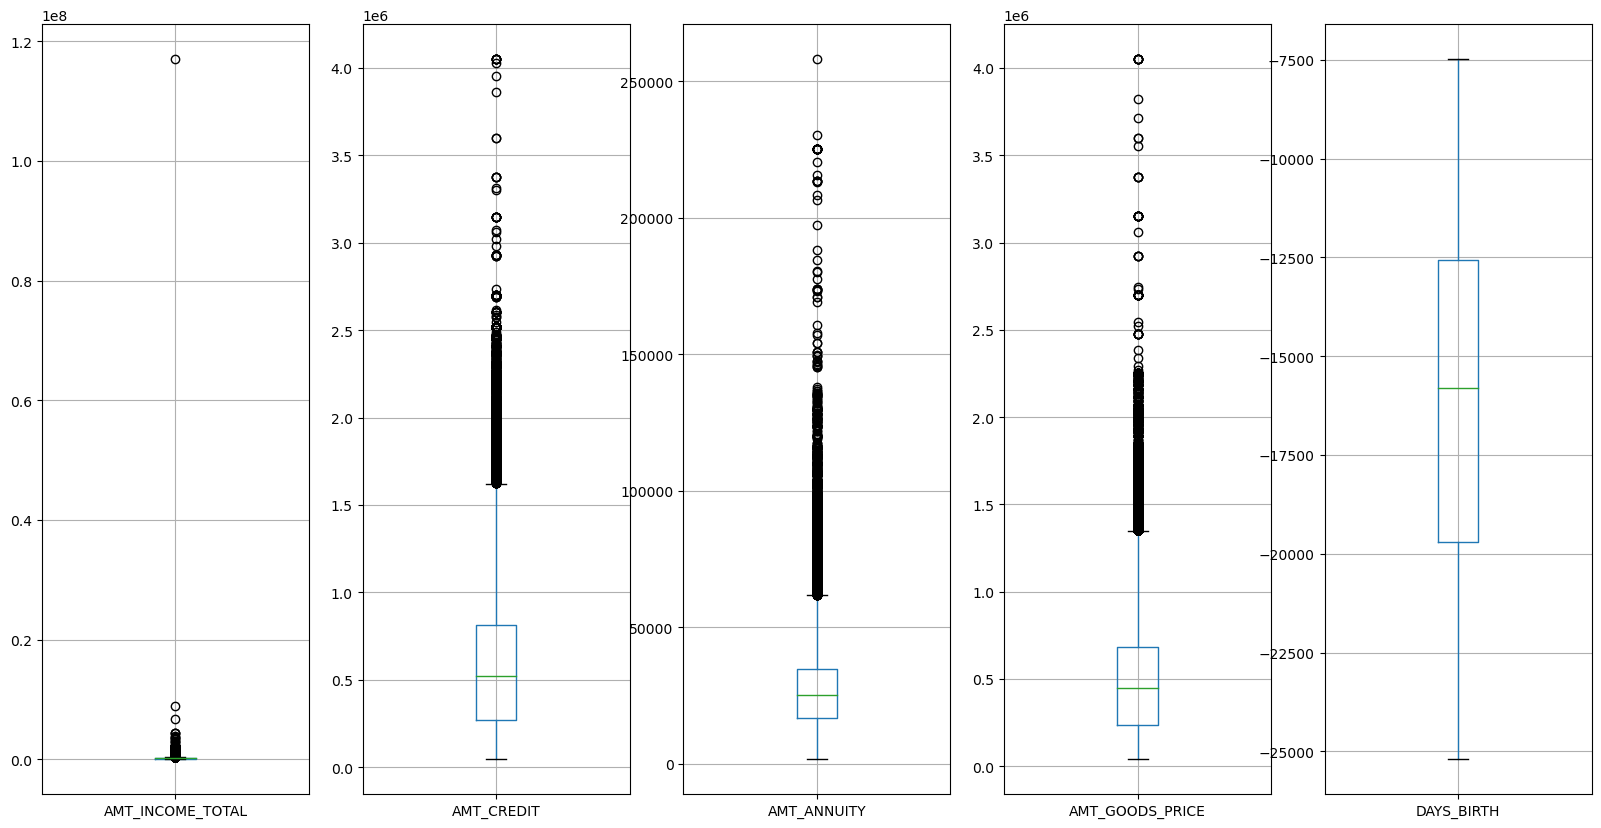

In [21]:
# ploting subplots to analyse the same more
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    application_df.boxplot(column = col)
plt.show()

We observe that **AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE** variables have huge outliers as we can see the spike at 100 percentile. So we will use 1.5 IQR rule to remove outliers

In [22]:
# removing outliers using 1.5 IQR method for all the columns we analysed above.
for col in cols: 
    q1 = application_df[col].quantile(0.25)
    q3 = application_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    application_df = application_df.loc[(application_df[col] > range_low) & (application_df[col] < range_high)]

In [23]:
#calculating the percentage of retained rows
round((application_df.shape[0] / app_data.shape[0])*100,2)

77.42

In [24]:
#converting DAYS_BIRTH to year
application_df['DAYS_BIRTH'] = abs(application_df['DAYS_BIRTH'] // 365)

In [25]:
# Creating bins for income amount

print(application_df['AMT_INCOME_TOTAL'].describe())
q25 = application_df['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = application_df['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count    238077.000000
mean     151837.657362
std       61231.359085
min       26100.000000
25%      112500.000000
50%      135000.000000
75%      184500.000000
max      337050.000000
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 157500.0)

In [26]:
# Creating income category groups
def income_category(value):
    if value <= q25:
        return 'Low'
    elif value > q25 and value <= q60:
        return 'Medium'
    else:
        return 'High'

application_df['INCOME_CATEGORY'] = application_df['AMT_INCOME_TOTAL'].apply(income_category)

In [27]:
# Creating age gategory groups
def age_category(value):
    if value <= 35:
        return 'Young'
    elif value > 35 and value <= 55:
        return 'Mid Age'
    else:
        return 'Old'
application_df['AGE_CATEGORY'] = application_df['DAYS_BIRTH'].apply(age_category)

In [28]:
print(round(application_df['AMT_CREDIT'].describe(), 3))
q50 = application_df['AMT_CREDIT'].quantile(0.5)
q75 = application_df['AMT_CREDIT'].quantile(0.75)

q50,q75

count     238077.000
mean      535478.633
std       318887.355
min        45000.000
25%       270000.000
50%       481495.500
75%       755190.000
max      1597779.000
Name: AMT_CREDIT, dtype: float64


(481495.5, 755190.0)

In [29]:
# creating Credit amount groups
def credit_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['CREDIT_CATEGORY'] = application_df['AMT_CREDIT'].apply(credit_category)

In [30]:
# The ratio of the applicants with no payment difficulties (Target = 0) and with payment difficulties (Target = 1)
100*application_df['TARGET'].value_counts(normalize = True)

0    91.979906
1     8.020094
Name: TARGET, dtype: float64

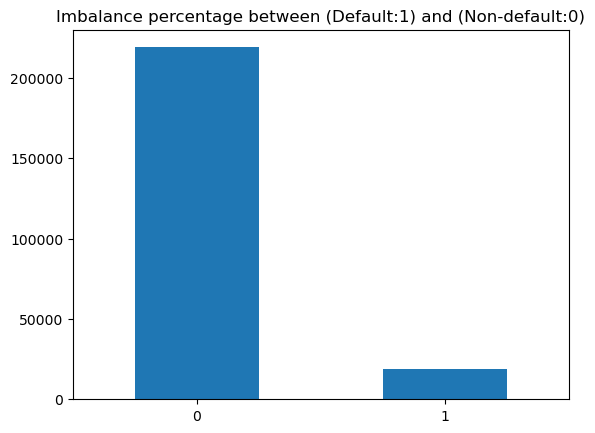

In [31]:
# graphical analysis of the share
application_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance percentage between (Default:1) and (Non-default:0)')
plt.xticks(rotation = 0)
plt.show()

The above graph tells us that the Non-defaulters are extremely more that defaulters, even though it seems that the defaulters are very small in very small number
We should analyse closely these entires as even an extremely small amount of defaulters are very expensive for the company


## Step2: Exploratory Data Analysis

In [32]:
# Creating two different data frames with defaulters and non-defaulters seperately to analyse better.

#creating dataframe with TARGET = 1 (payment defaulted)
app_target_default = application_df.loc[application_df['TARGET'] == 1]
print('Dimension of the default dataset',app_target_default.shape)
display(app_target_default.head())

print(                           )
#creating dataframe with TARGET = 0 (payment not defaulted)
app_target_nondefault = application_df.loc[application_df['TARGET'] == 0]
print('Dimension of the non-default dataset',app_target_nondefault.shape)
display(app_target_nondefault.head())

Dimension of the default dataset (19094, 43)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0           26           -637            -3648.0            -2120   
26          52          -2628            -6573.0            -1827   
40          48          -1262            -1182.0            -1029   
42          37          -3597              -45.0            -4409   
81          68         365243            -5391.0            -4199   

    CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0               1.0                     2                            2   
26              1.0                     3                            2   
40              2.0                     2                            2   
42              2.0                     3                            3   
81              2.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

    LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
26                            0                       0   
40                            0                       0   
42                            0                       0   
81                            0                       0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                        0                        0  Business Entity Type 3   
26                       0                        0  Business Entity Type 3   
40                       0


Dimension of the non-default dataset (218983, 43)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
8      100011       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
8               Y             0          112500.0   1019610.0      33826.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   
8         913500.0        Pensioner  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
8               Married  House / apartment                    0.018634   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1          46          -1188            -1186.0             -291   
2          53           -225            -4260.0            -2531   
4          55          -3038            -4311.0            -3458   
5          47          -1588            -4970.0             -477   
8          56         365243            -7427.0            -3514   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1              2.0                     1                            1   
2              1.0                     2                            2   
4              1.0                     2                            2   
5              2.0                     2                            2   
8              2.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   
8                  WEDNESDAY                       14   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
4                           0                           0   
5                           0                           0   
8                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
4                            0                       0   
5                            0                       0   
8                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
1                       0                        0            School   
2                       0                        0        Government   
4                       1                        1          Religion   
5                       0                        0        

### Graphical analysis


In [33]:
# checking all the columns
app_target_default.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_B

In [34]:
# splitting the columns which are categorical and continuous for better understanding

categorical = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY', 'CREDIT_CATEGORY']

continious = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3']

### Categorical column analysis


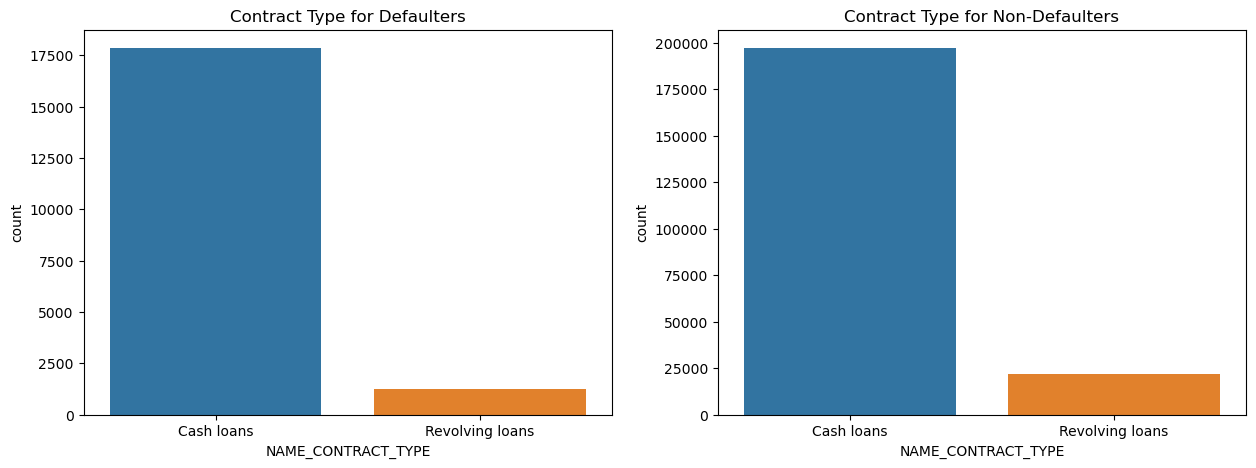

In [35]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_default)
plt.title('Contract Type for Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_nondefault)
plt.title('Contract Type for Non-Defaulters')

plt.show()

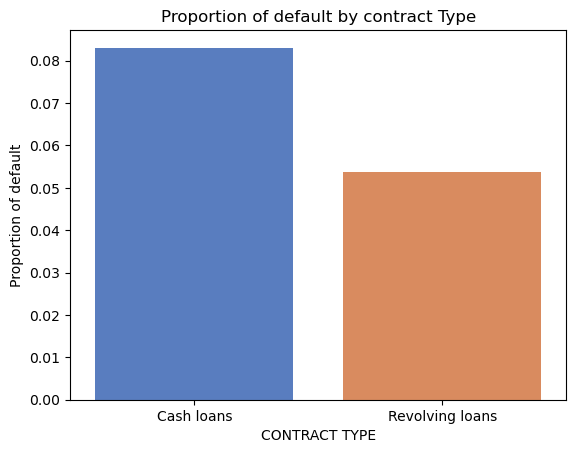

In [36]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_CONTRACT_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_CONTRACT_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_CONTRACT_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('CONTRACT TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Number of Cash loans are higher in both default/ non-default cases than Revolving loans. The proportion of default is higher in cash loan category compared to the revolving loans

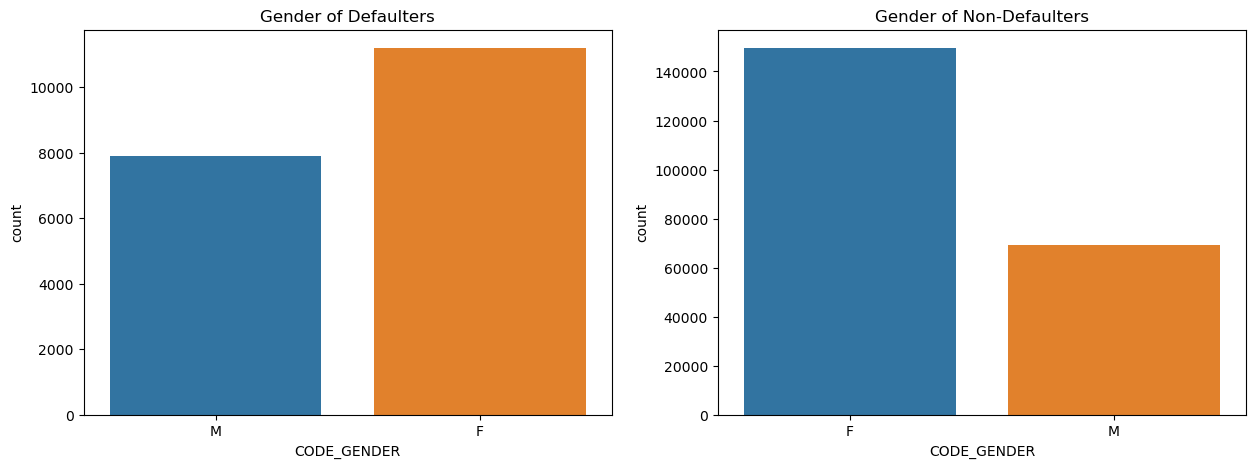

In [37]:
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = app_target_default)
plt.title('Gender of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = app_target_nondefault)
plt.title('Gender of Non-Defaulters')

plt.show()

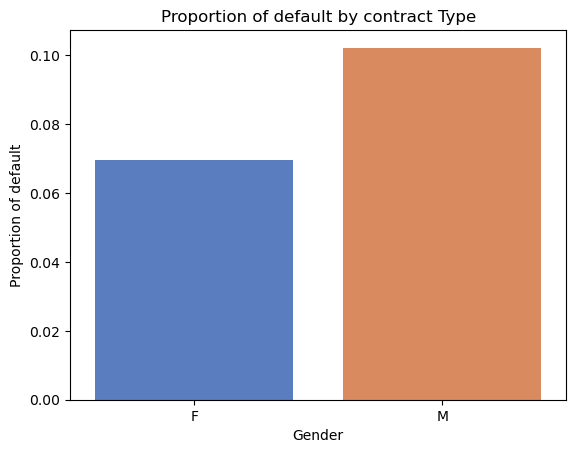

In [38]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['CODE_GENDER'])['TARGET'].value_counts()/application_df.groupby(['CODE_GENDER'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['CODE_GENDER'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['CODE_GENDER','Non-default']
ax2 = sns.barplot(x='CODE_GENDER', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

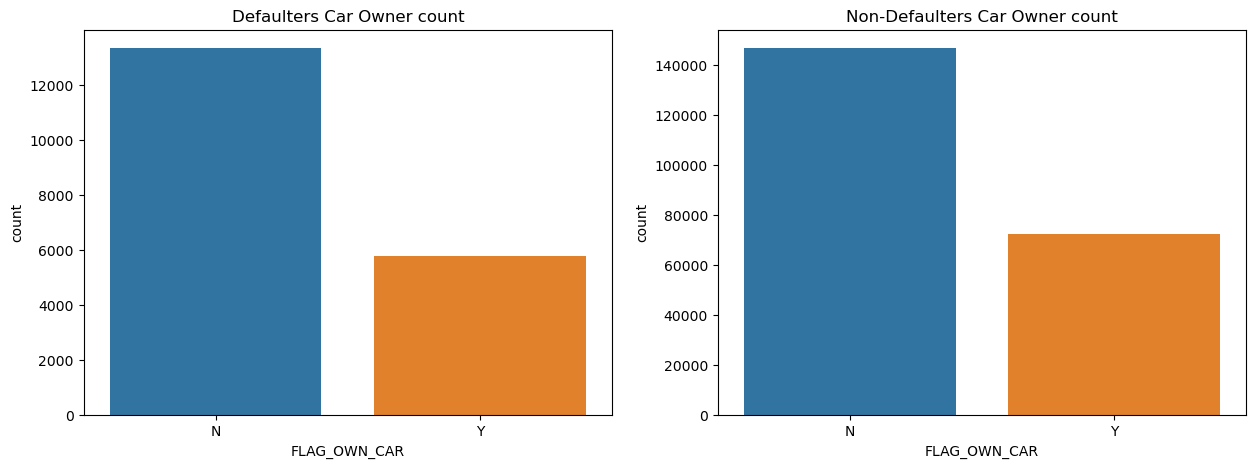

In [39]:
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_default)
plt.title('Defaulters Car Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_nondefault)
plt.title('Non-Defaulters Car Owner count')

plt.show()

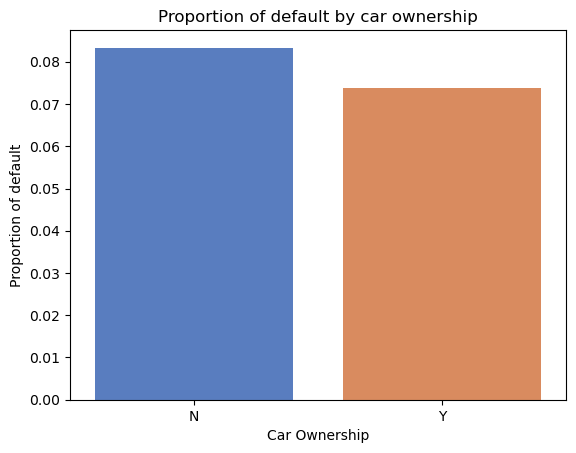

In [40]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_CAR'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_CAR','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_CAR', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Car Ownership')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by car ownership')
plt.show()

Defalut/Non-default both the cases, the count of client who do not own car is higher than who owns a car. The proportion of default is higher for non-car owners relative to the car owners.

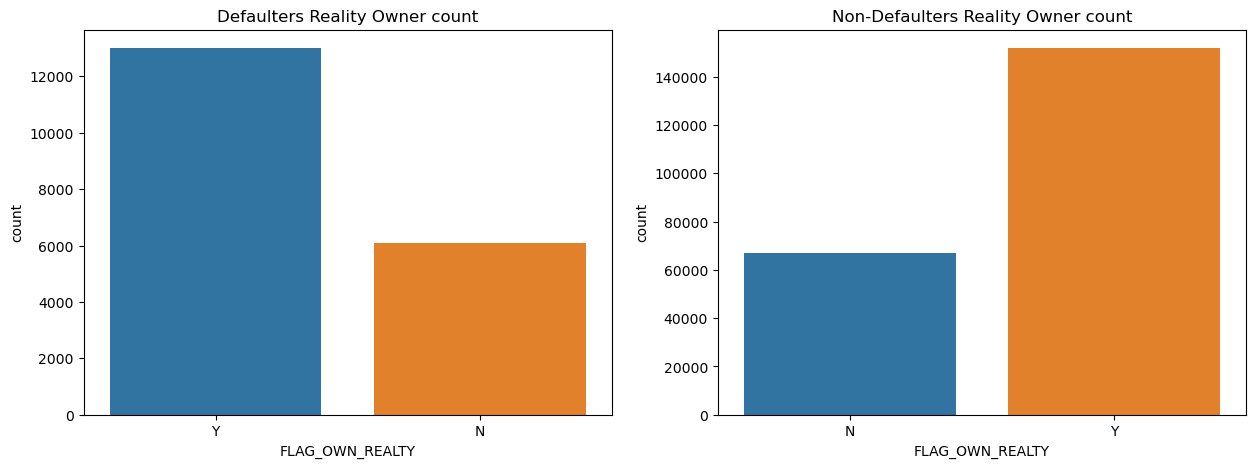

In [41]:
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_default)
plt.title('Defaulters Reality Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_nondefault)
plt.title('Non-Defaulters Reality Owner count')

plt.show()

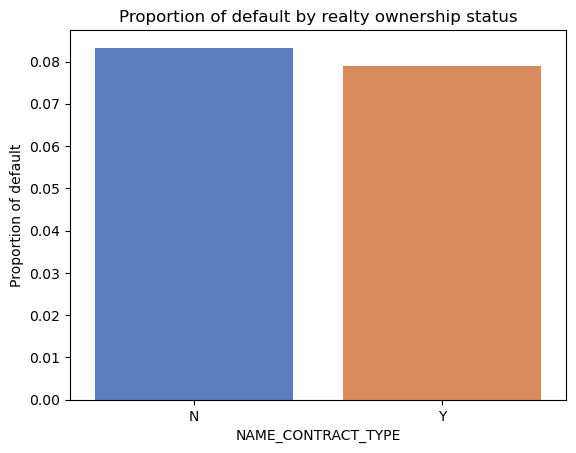

In [42]:

# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_REALTY'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_REALTY','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_REALTY', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by realty ownership status')
plt.show()

Defalut/Non-default both the cases, the count of client who do own real estate is higher than who has not. Applicants with no realty ownership has a higher propensity to default than the clients who own real estate.

In [43]:
# analysis for income type

display(pd.DataFrame(app_target_default['NAME_INCOME_TYPE'].value_counts()))
display(pd.DataFrame(app_target_nondefault['NAME_INCOME_TYPE'].value_counts()))

NAME_INCOME_TYPE
Working                          11838
Commercial associate              3924
Pensioner                         2338
State servant                      994

NAME_INCOME_TYPE
Working                         113565
Commercial associate             47282
Pensioner                        42339
State servant                    15777
Student                             13
Unemployed                           4
Businessman                          2
Maternity leave                      1

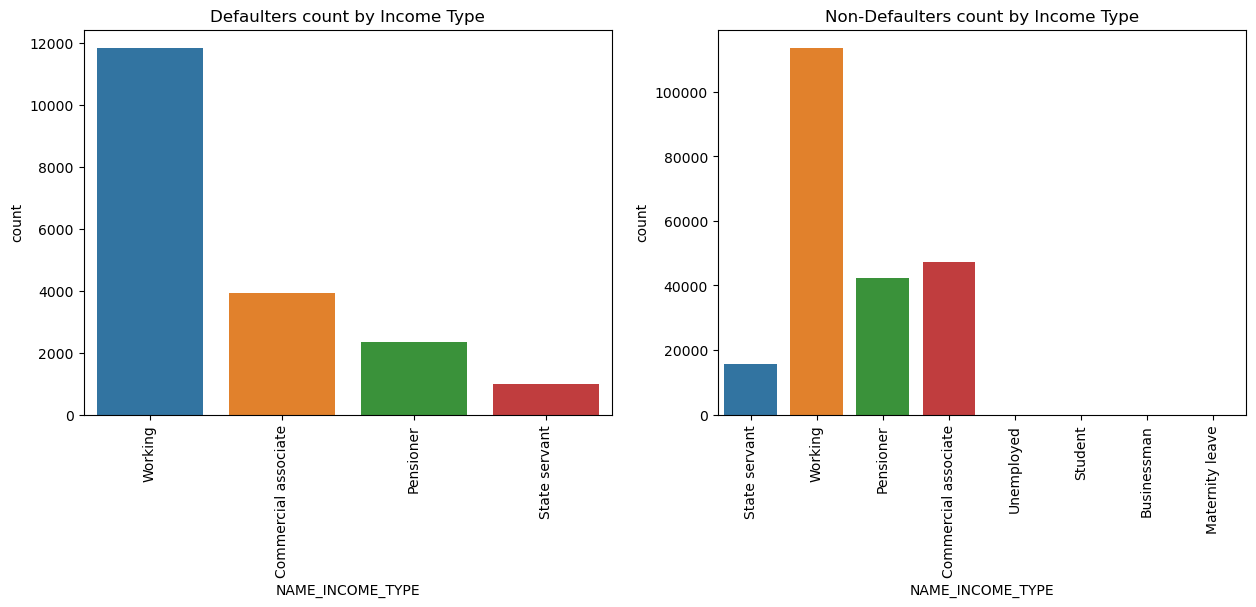

In [44]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

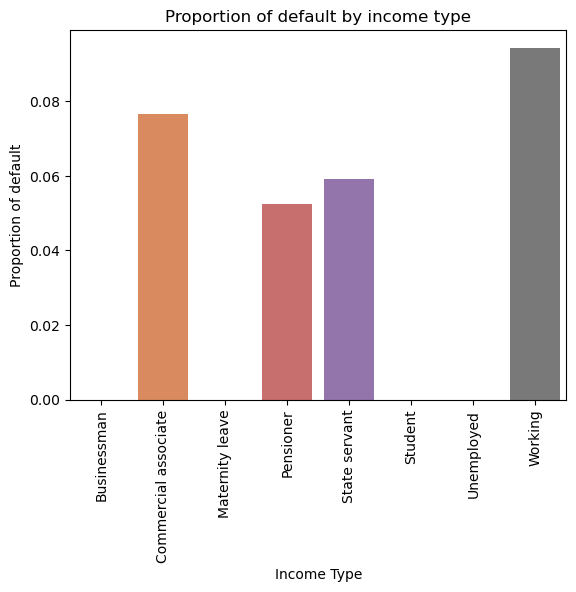

In [45]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_INCOME_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_INCOME_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_INCOME_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by income type')
plt.xticks(rotation = 90)
plt.show()

Majority of the applicants are from working, commercial associate, pensioners and state servants. The remaining categories of income types are very small. The proportion of default is high among the working and the commercial associates. It is relatively lower for the pensioner and state servant.

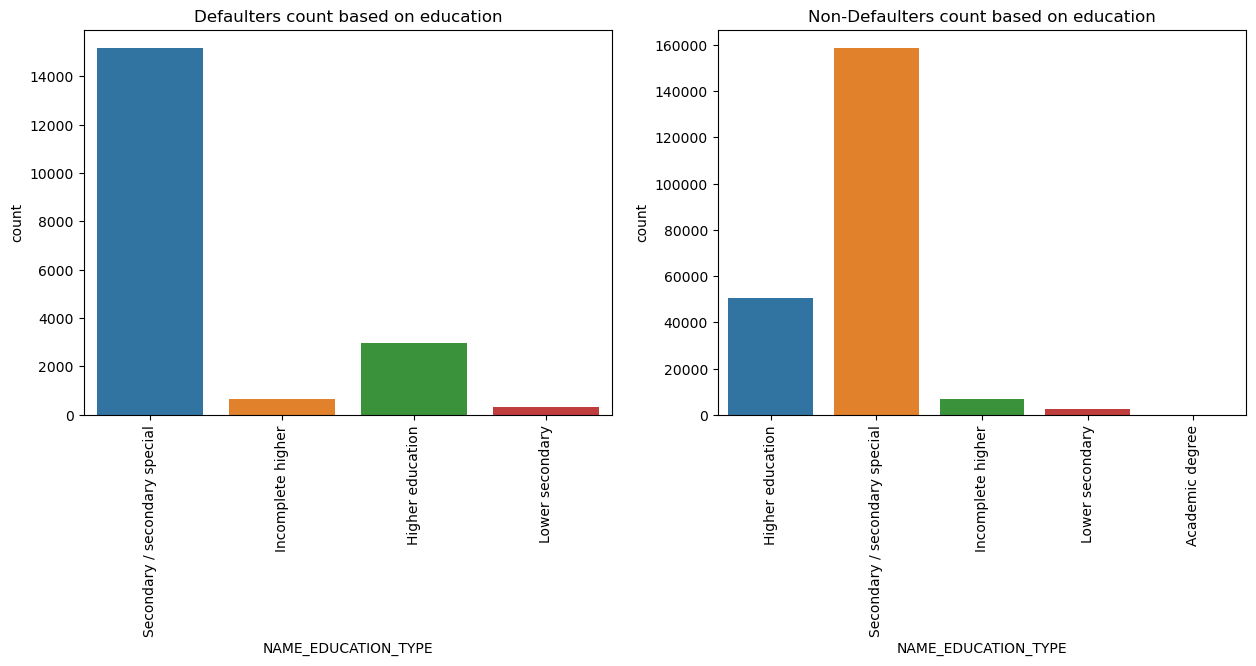

In [46]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

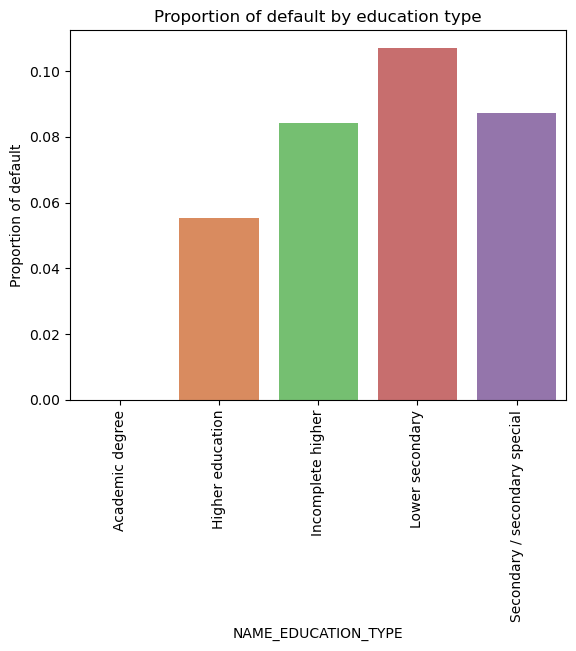

In [47]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_EDUCATION_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_EDUCATION_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_EDUCATION_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by education type')
plt.xticks(rotation = 90)
plt.show()

Applicants with secondary and higher secondary education are among the highest defaulters as well as not defaulters. Whereas, applicants with academic degrees are the smallest group of applicants that have applied for the loan and applicants from this background has no recorded of default. From the above figure, we see that a distinct pattern emerges. The chances of default is lower as the education level of the applicants increases.

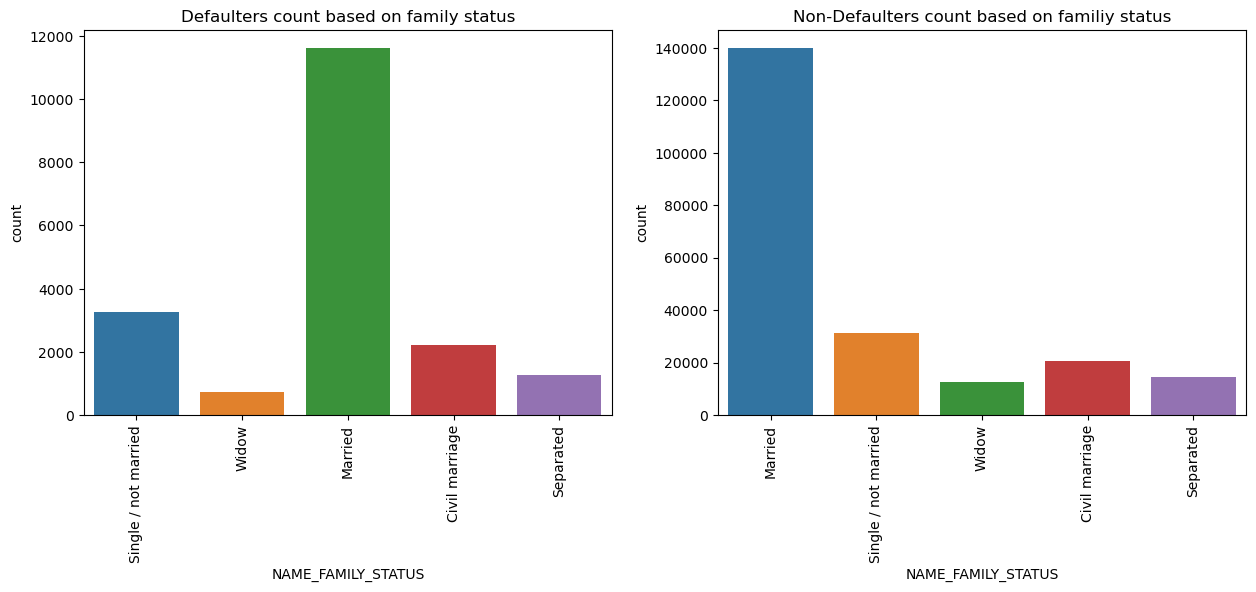

In [48]:

# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on family status')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on familiy status')

plt.show()

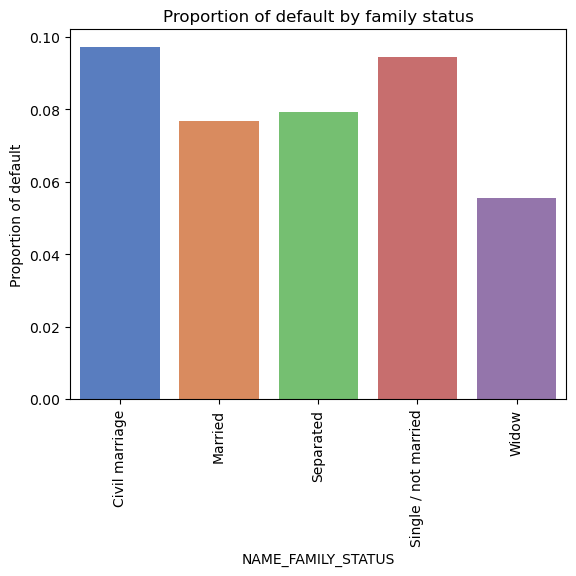

In [49]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts()/application_df.groupby(['NAME_FAMILY_STATUS'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_FAMILY_STATUS'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_FAMILY_STATUS','Non-default']
ax2 = sns.barplot(x='NAME_FAMILY_STATUS', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_FAMILY_STATUS')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by family status')
plt.xticks(rotation = 90)
plt.show()

Applicants who are married are among the highest number of defaulters and non-defaulters. Whereas, widows are the lowest number of defaulters and non-defaulters. The proportion of default is the highest among the applicants who are in civil marriage category followed by applicants who are single.

### Continuos columns analysis

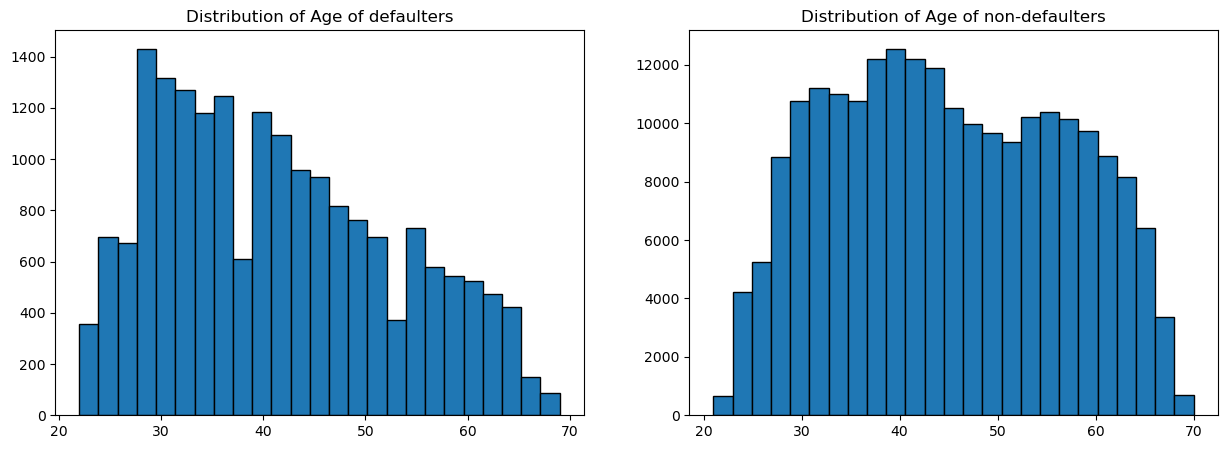

In [50]:
#plotting age 'DAYS_BIRTH' histogram
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_default['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of defaulters')
plt.subplot(1,2,2)
plt.hist(app_target_nondefault['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of non-defaulters')

plt.show()


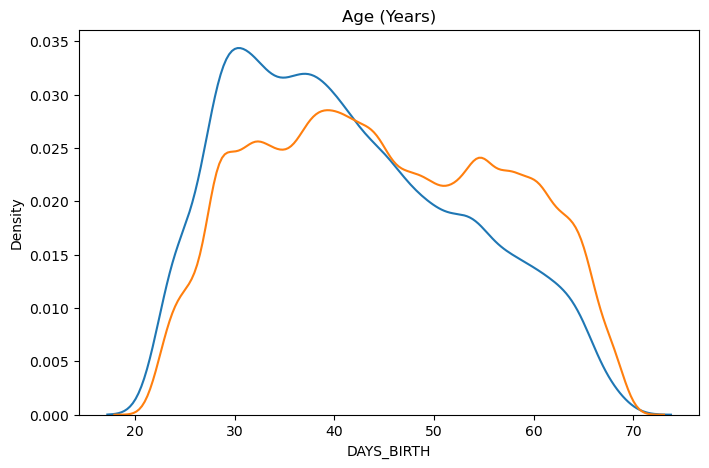

In [51]:
#plotting kde plot of 'DAYS_BIRTH'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['DAYS_BIRTH'], label = 'default')
sns.kdeplot(app_target_nondefault['DAYS_BIRTH'], label = 'non-default')
plt.title(r'Age (Years)')
plt.show()

Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people. Non-defaulted people are almost equally distributed.

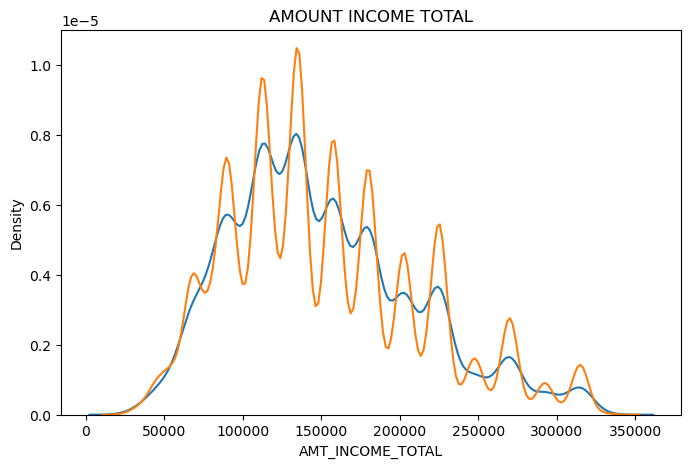

In [52]:
#plotting kde plot of 'AMT_INCOME_TOTAL'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_INCOME_TOTAL'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_INCOME_TOTAL'], label = 'non-default')
plt.title('AMOUNT INCOME TOTAL')
plt.show()

There are interesting patterns in both the default and non-default people with respect to Income Total. From 75000 to 200000 income has some spikes and then higher the income, the lesser spike we can see for default people. However, the pattern is same for both the default and non-default. The frequency range of non-default people is larger than default.

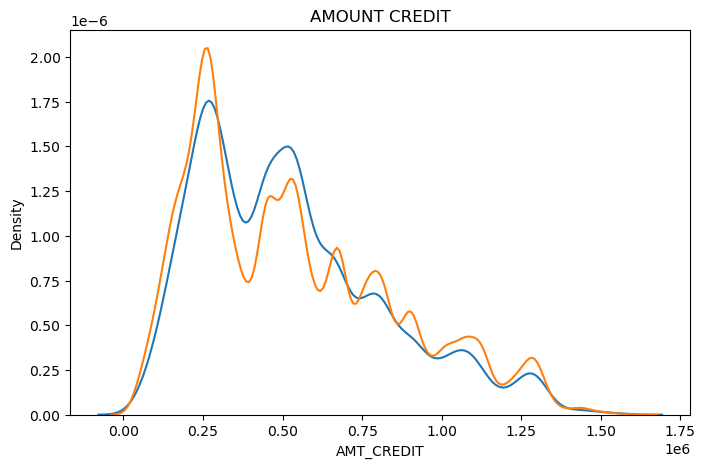

In [53]:
#plotting kde plot of 'AMT_CREDIT'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_CREDIT'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_CREDIT'], label = 'non-default')
plt.title('AMOUNT CREDIT')
plt.show()

Lesser the loan amount higher the default.

In [54]:
# target by days birth and income
c = pd.DataFrame(application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_ageinc = pd.pivot_table(c, values ='Per_Target', index =['AGE_CATEGORY','INCOME_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_ageinc.drop(0, axis = 1, inplace = True)

target_by_ageinc1 = pd.pivot_table(target_by_ageinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['AGE_CATEGORY'], aggfunc = np.sum) 

target_by_ageinc1

AGE_CATEGORY      Mid Age       Old     Young
INCOME_CATEGORY                              
High             0.078302  0.051390  0.095438
Low              0.077878  0.049041  0.117587
Medium           0.081344  0.052098  0.112219

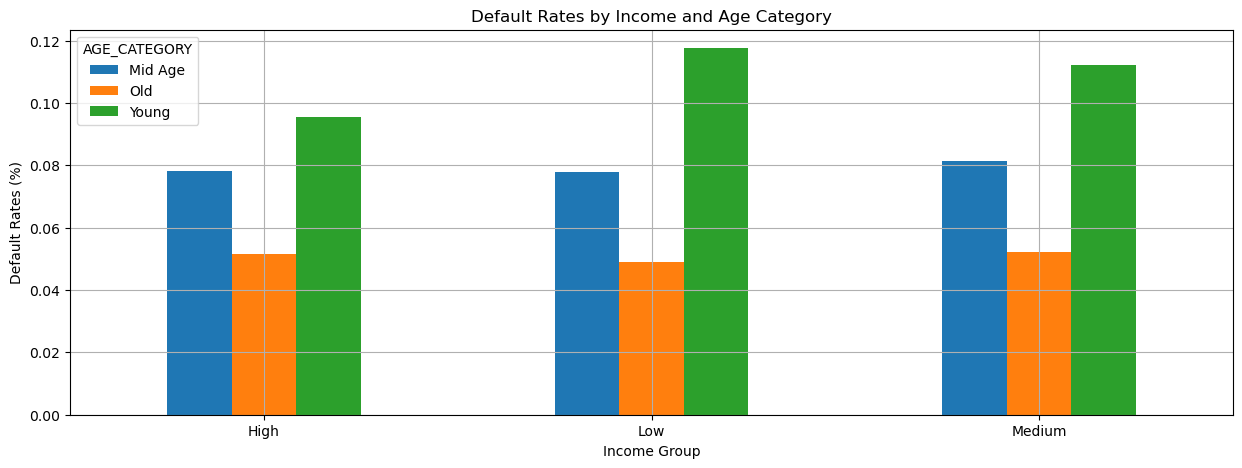

In [55]:
# figure
ax = target_by_ageinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Age Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

We see from the above diagram that irrespective of the income groups, the chances of default decreases as the age of the applicants increases.

In [56]:

# target income and credit
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_creditinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','CREDIT_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_creditinc.drop(0, axis = 1, inplace = True)

target_by_creditinc1 = pd.pivot_table(target_by_creditinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['CREDIT_CATEGORY'], aggfunc = np.sum) 

target_by_creditinc1

CREDIT_CATEGORY      High       Low    Medium
INCOME_CATEGORY                              
High             0.066618  0.079125  0.090570
Low              0.070522  0.078998  0.085472
Medium           0.070421  0.084602  0.094747

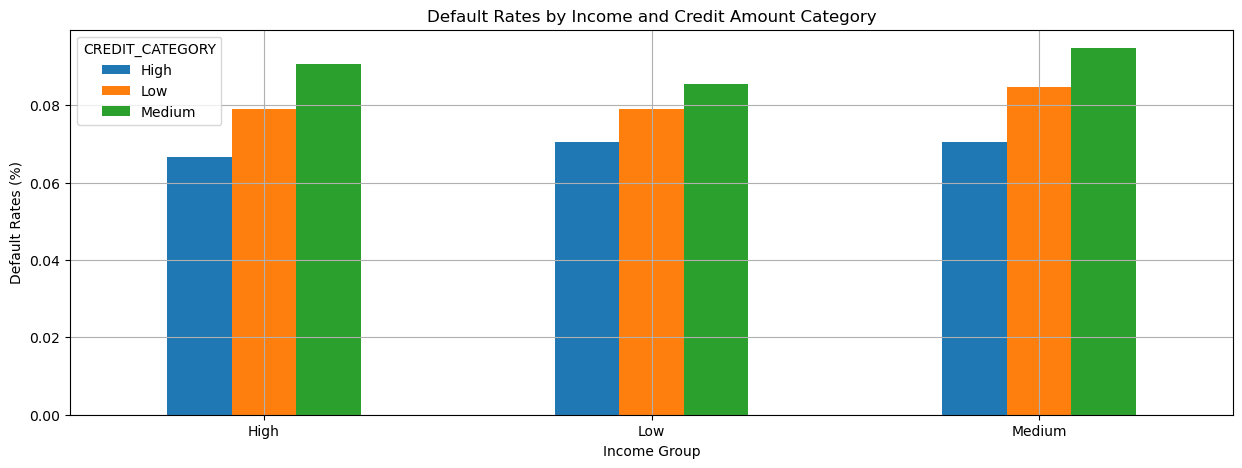

In [57]:
# figure
ax = target_by_creditinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Credit Amount Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

From the above plot, we find that irrespective of the income group, the chances of default increases as the credit amount increases. Also if we compare credit amount categories by different income groups, then the default rates for all the three credit amount categories are lower in the high income group relative to the medium and low income groups.

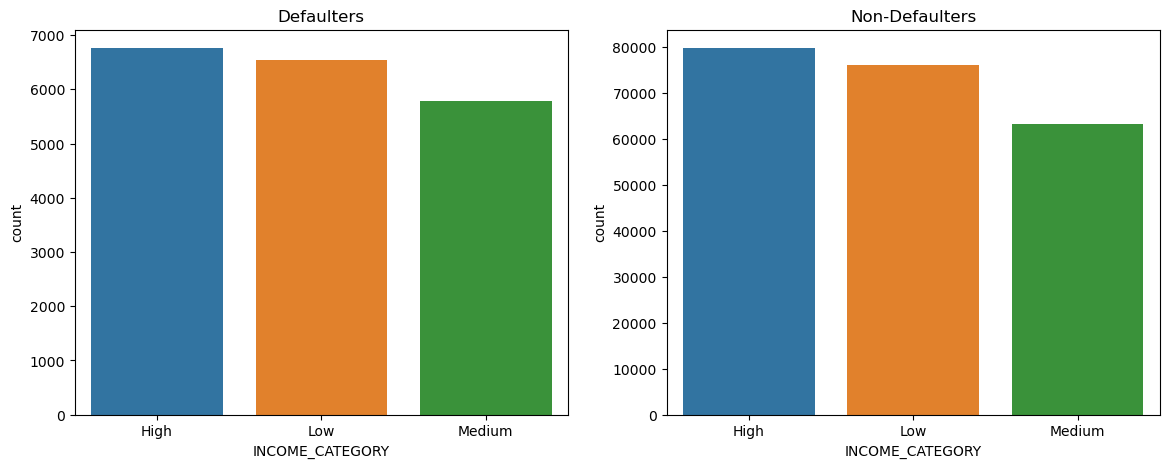

In [58]:
#plotting count plot on INCOME CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

High income groups have high defaults

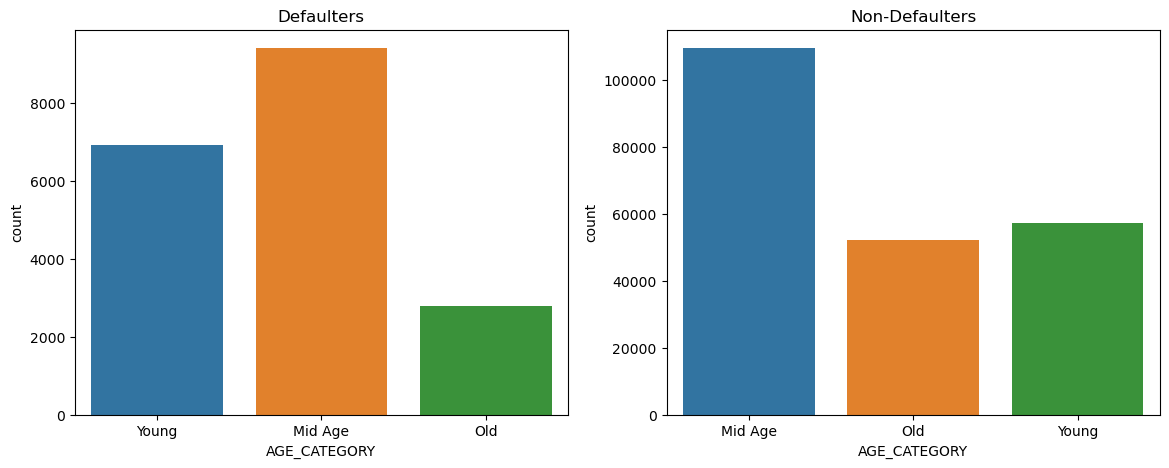

In [59]:
#plotting count plot on AGE_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

Mid age (35-55) age group of people are more likely to be defaulted followed by the young people.

Education Status Vs Gender wise defaulters

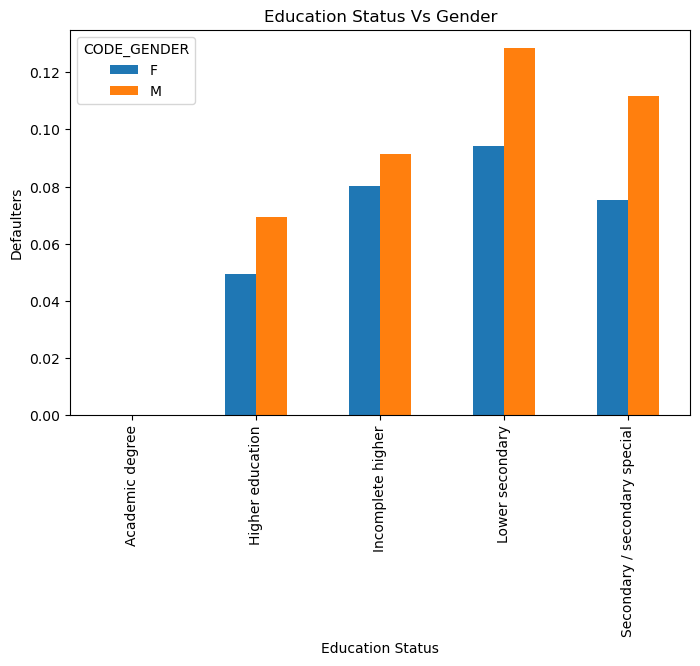

In [60]:
application_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('Defaulters')
plt.title('Education Status Vs Gender')
plt.show()

Male with lower secondary education has more defaluts than any other

Correlation of the continuous variables of Defaulter data frame

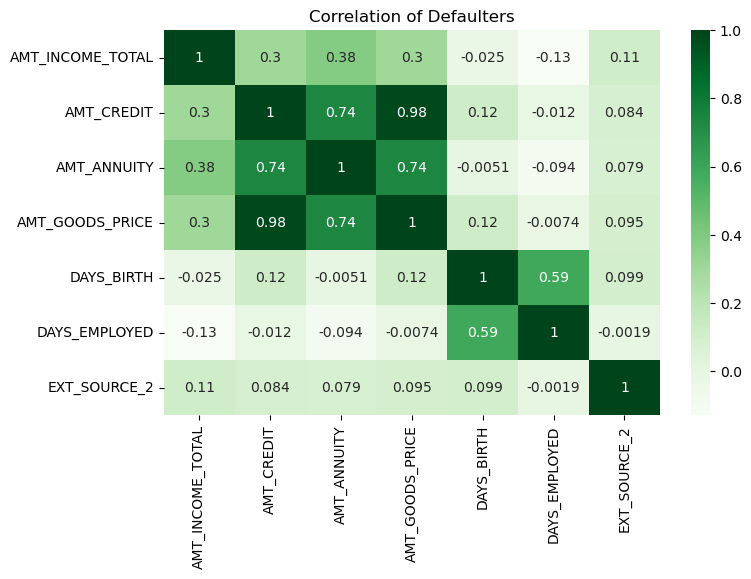

In [61]:
# plotting heatmap where TARGET = 1
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2']
cor = app_target_default[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True, cmap = 'Greens')
plt.title('Correlation of Defaulters')
plt.show()

We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are highly correlated. External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.

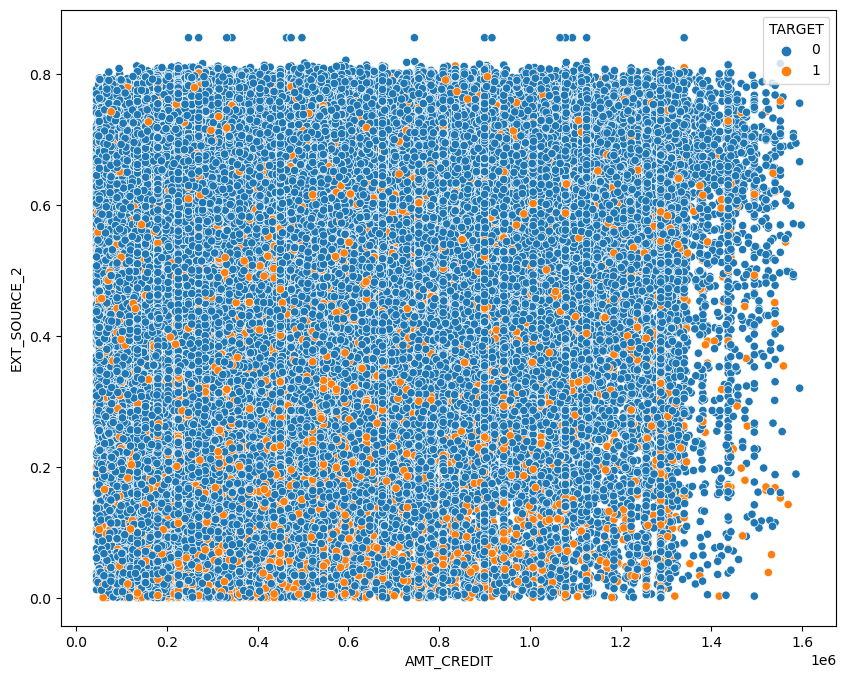

In [62]:
#plotting for CREDIT and EXT Rating
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'EXT_SOURCE_2', hue='TARGET', data = application_df)
plt.show()

From the above plot, we cannot get much insight as the data is scattered across the plot. However, we can see some concentration of defaulters near the low rating region between 0.0 to 3.0.

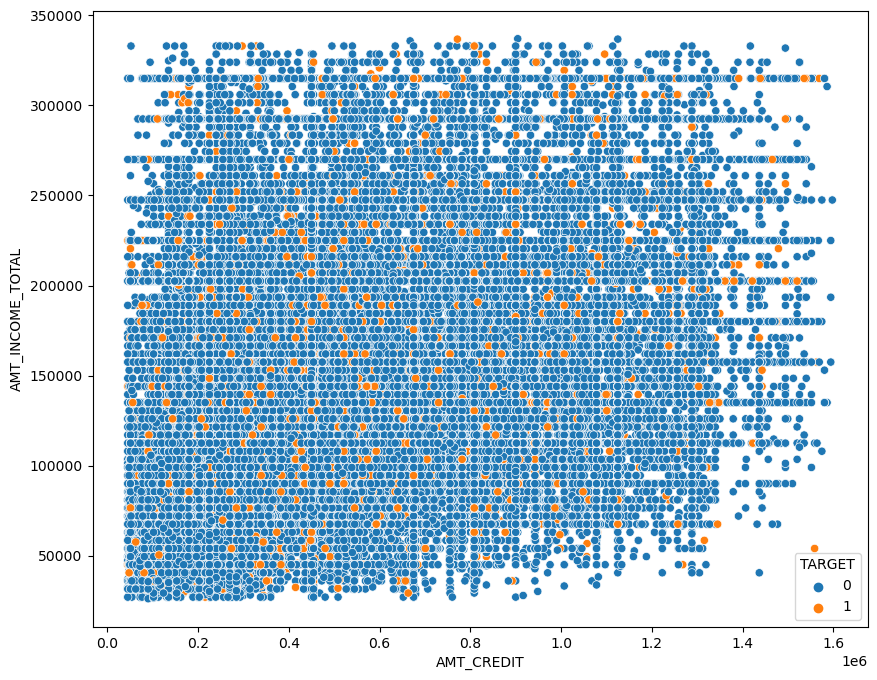

In [63]:
#plotting for CREDIT and Total Income
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_INCOME_TOTAL', hue='TARGET', data = application_df)
plt.show()

We can see that there is no particular pattern w.r.t. income and credit. No relation here

### Bivariate analysis on categorical columns

In [64]:
# grouping all the categorical columns for analysis

categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY']

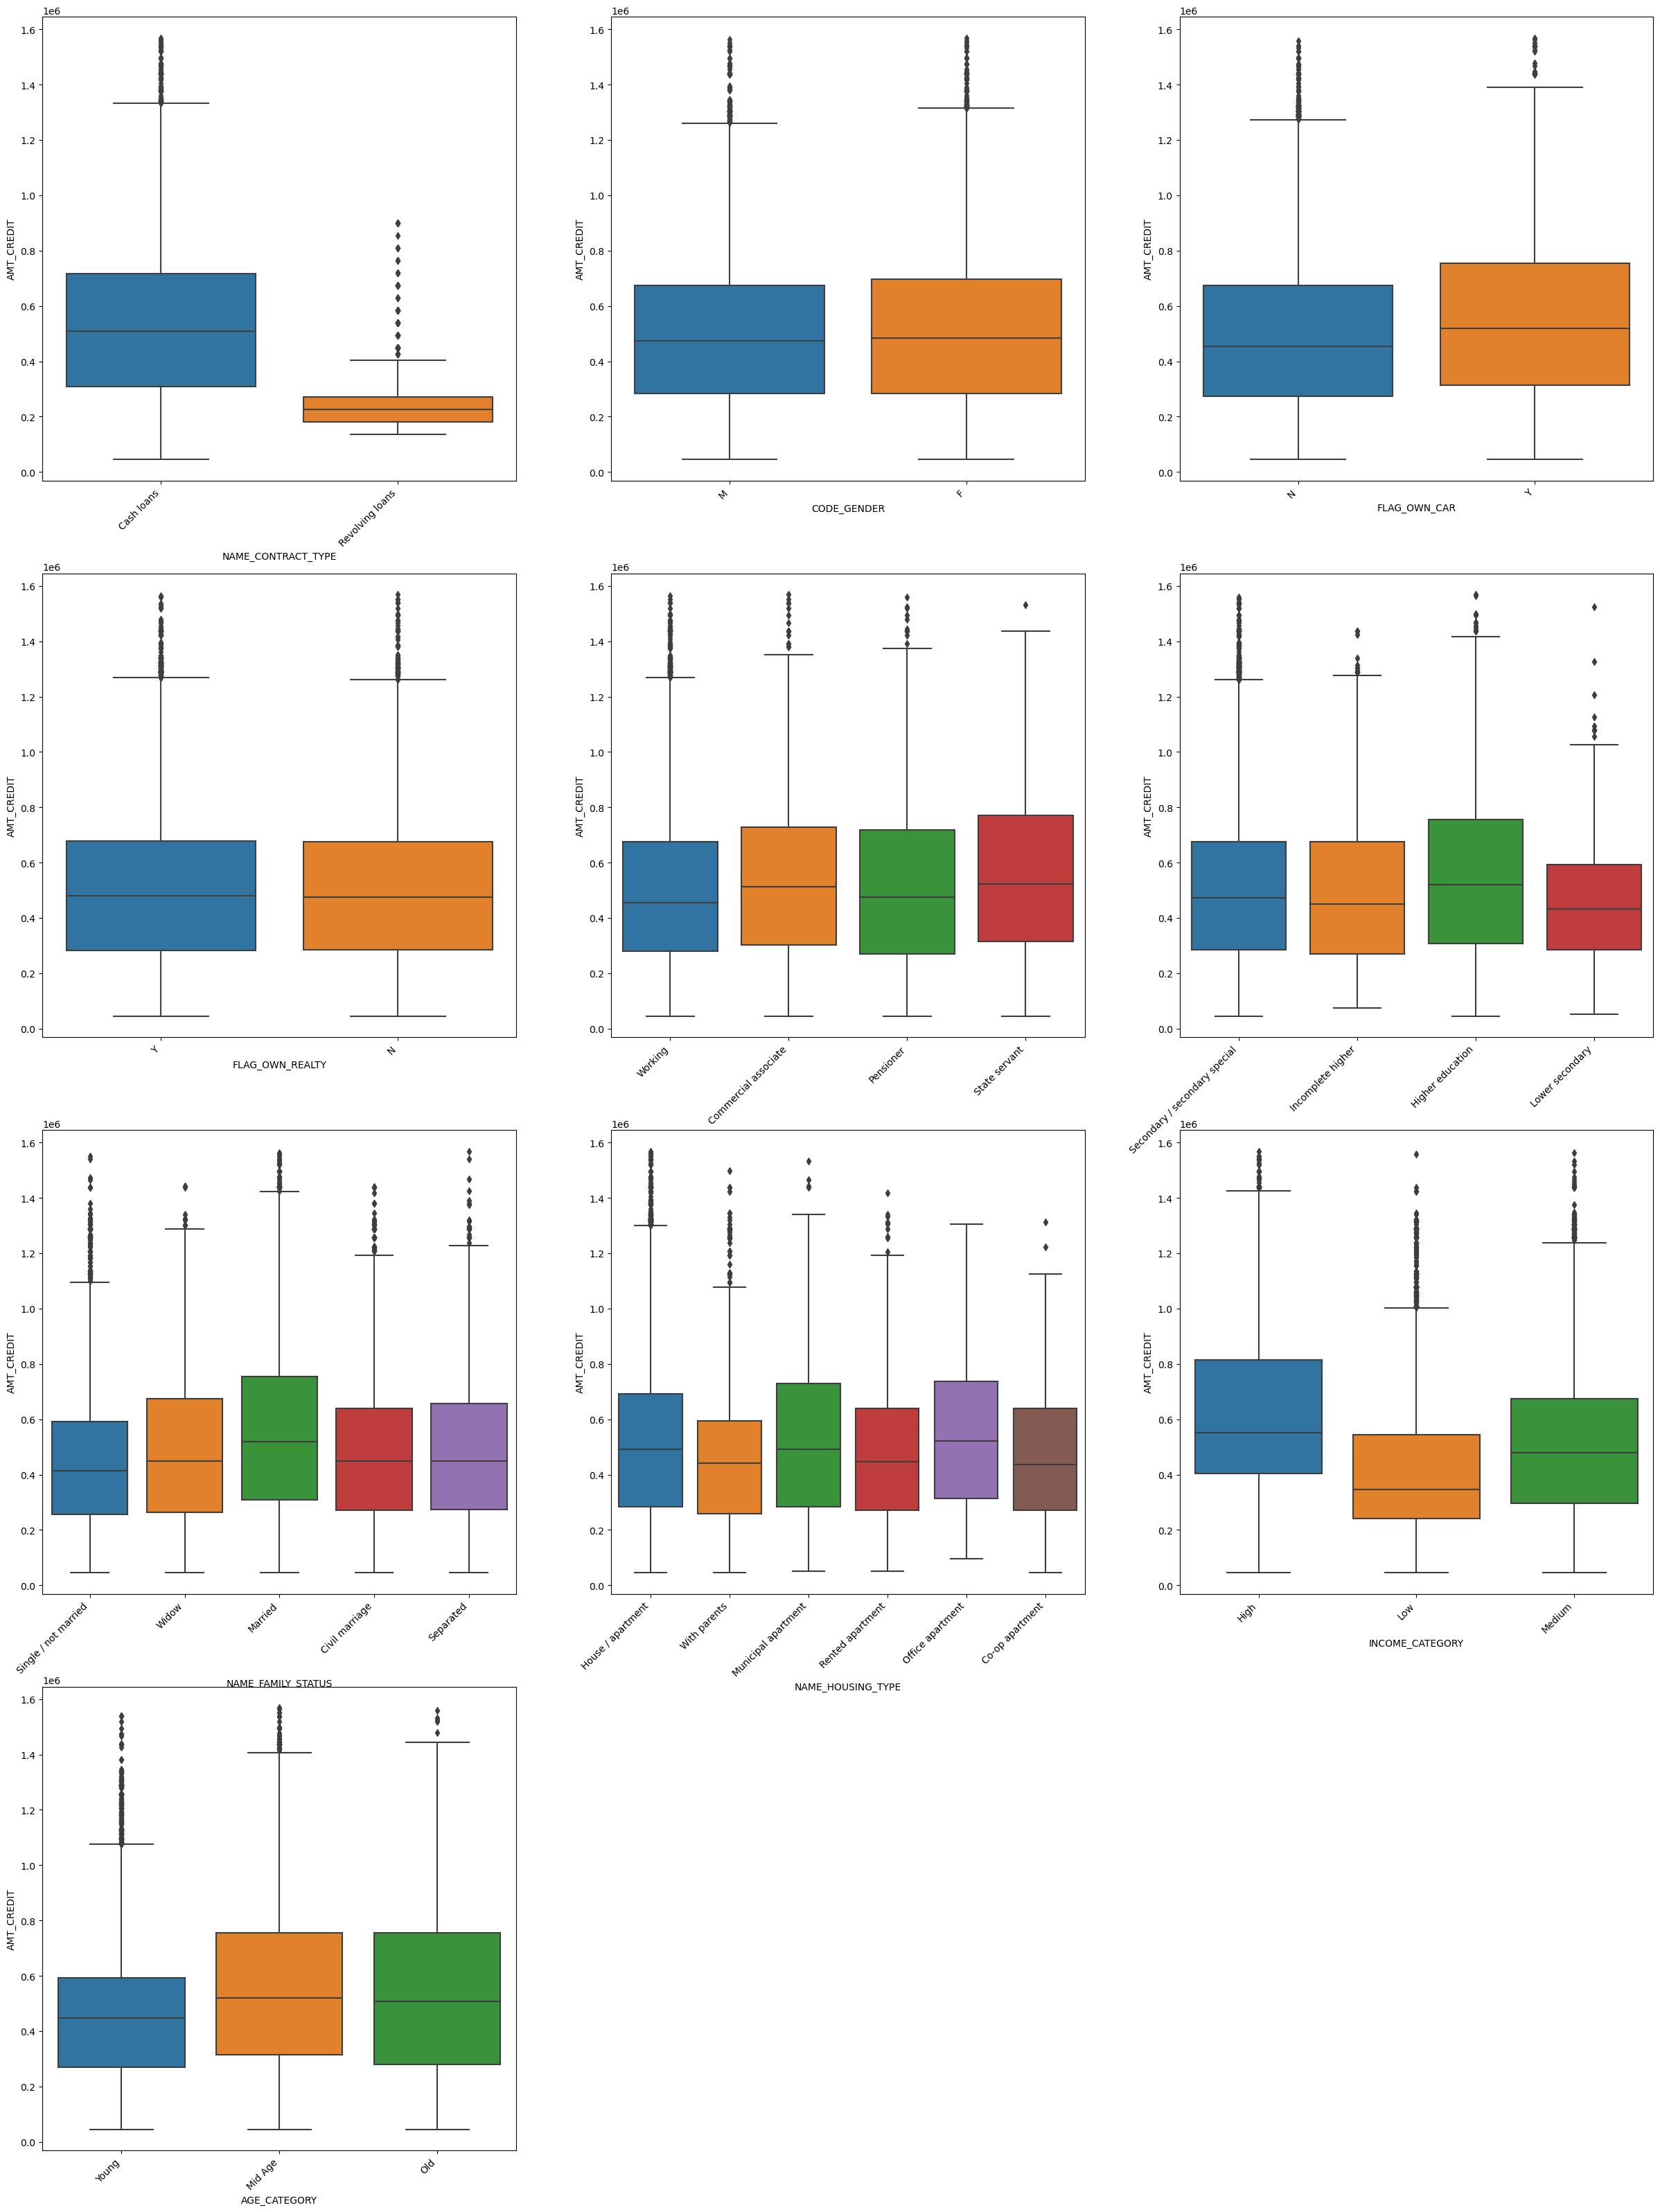

In [65]:
# plotting for Defaulters with all the categorical columns at once
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_default)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### from above graphical analysis we can concur the following

1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.

## Previous data

In [66]:
#loading previous application data
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

### Treating missing values

In [67]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [68]:

#checking for unique values in each columns to see any irregularites
for col in prev_data.columns:
    print(col)
    print('------------------')
    print(prev_data[col].unique())
    print()

SK_ID_PREV
------------------
[2030495 2802425 2523466 ... 2659632 2785582 2418762]

SK_ID_CURR
------------------
[271877 108129 122040 ... 253940 353284 191629]

NAME_CONTRACT_TYPE
------------------
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

AMT_ANNUITY
------------------
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]

AMT_APPLICATION
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]

AMT_CREDIT
------------------
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]

AMT_DOWN_PAYMENT
------------------
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]

AMT_GOODS_PRICE
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]

WEEKDAY_APPR_PROCESS_START
------------------
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

HOUR_APPR_PROCESS_START
------------------
[15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]

FLAG_LA

Replacing all the **XNA , XAP** values to **NAN** so that we can treat these as null values and further enhance them

In [69]:
prev_data.replace('XNA',np.nan,inplace=True)
prev_data.replace('XAP',np.nan,inplace=True)

In [70]:
#checking for missing value perventage columns wise
round(100*(prev_data.isnull().sum() / len(prev_data.index)),3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.021
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE         95.831
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE              37.563
CODE_REJECT_REASON             81.327
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.116
NAME_GOODS_CATEGORY            56.927
NAME_PORTFOLIO                 22.286
NAME_PRODUCT_TYPE              63.684
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [71]:
#dropping all the columns which has missing value more than 30%
previous_df = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.3], axis = 1)

In [72]:
# dropping columns which seems to be not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

previous_df = previous_df.drop(cols_to_be_deleted, axis = 1)

In [73]:
#checking number of rows have where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values
print(len(previous_df[np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT'])].index))

333855


In [74]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
previous_df = previous_df[~(np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT']))]
previous_df.shape

(1336359, 13)

In [75]:
#checking for missing value perventage columns wise after removing the rows
round(100*(previous_df.isnull().sum() / len(previous_df.index)),2)

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
CNT_PAYMENT             2.87
dtype: float64

In [76]:
# checking for outliers
round(previous_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)


AMT_ANNUITY  AMT_GOODS_PRICE  CNT_PAYMENT
count  1297979.000      1284699.000  1297984.000
mean     15955.121       227847.279       16.054
std      14782.137       315396.558       14.567
min          0.000            0.000        0.000
5%        2726.595        22882.500        0.000
25%       6321.780        50841.000        6.000
50%      11250.000       112320.000       12.000
75%      20658.420       234000.000       24.000
90%      34703.820       585000.000       36.000
95%      45336.780       900000.000       48.000
99%      69685.789      1395000.000       60.000
max     418058.145      6905160.000       84.000

In [77]:
# removing outliers using 1.5 IQR method
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
for col in cols: 
    q1 = previous_df[col].quantile(0.25)
    q3 = previous_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    previous_df = previous_df.loc[(previous_df[col] > range_low) & (previous_df[col] < range_high)]

In [78]:
# percentage data lost 
100 * ((prev_data.shape[0] - previous_df.shape[0]) / prev_data.shape[0])

40.129827674777005

## Around 40% of data is lost while fixing the data, now the data seems to be usable

In [79]:

# converting all DAYS columns to month columns
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'] // 30)

In [80]:
previous_df.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
CNT_PAYMENT             float64
dtype: object

### Data types seems to be consistant with the type of data that the column has so we are not changing any dataType.

In [81]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_CATEGORY','AGE_CATEGORY','CREDIT_CATEGORY', 'DAYS_BIRTH']
application_sub = application_df[cols]
application_sub.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   
5      100008       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS INCOME_CATEGORY AGE_CATEGORY CREDIT_CATEGORY  \
0  Single / not married            High        Young             Low   
1               Married            High      Mid Age            High   
2  Single / not married             Low      Mid Age             Low   
4  Single / not married          Medium      Mid Age          Medium   
5               Married             Low      Mid Age          Medium   

   DAYS_BIRTH  
0          26  
1          46  
2          53  
4          55  
5          47

### Merging previous application data with application data for further analysis

In [82]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(previous_df,application_sub, on='SK_ID_CURR', how='left')
merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     1784265      202054         Cash loans    31924.395         337500.0   
3     1383531      199383         Cash loans    23703.930         315000.0   
4     2257824      161140         Cash loans    13832.775         211500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved              3   
1    136444.5         112500.0             Approved             11   
2    404055.0         337500.0              Refused             27   
3    340573.5         315000.0             Approved             23   
4    246397.5         211500.0             Approved             28   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash  Credit and cash offices         12.0   
2         Repeater           Cash  Credit and cash offices         24.0   
3         Repeater           Cash  Credit and cash offices         18.0   
4         Repeater           Cash  Credit and cash offices         30.0   

   TARGET CODE_GENDER            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0     0.0           F              Incomplete higher            Married   
1     NaN         NaN                            NaN                NaN   
2     0.0           F  Secondary / secondary special            Married   
3     0.0           M  Secondary / secondary special     Civil marriage   
4     0.0           F  Secondary / secondary special          Separated   

  INCOME_CATEGORY AGE_CATEGORY CREDIT_CATEGORY  DAYS_BIRTH  
0            High      Mid Age          Medium        40.0  
1             NaN          NaN             NaN         NaN  
2            High        Young          Medium        28.0  
3          Medium          Old            High        58.0  
4          Medium          Old             Low        64.0

In [83]:
# checking for the null value column wise in merged data frame
merged.isnull().sum()


SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE              0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_CLIENT_TYPE           628
NAME_PORTFOLIO               0
CHANNEL_TYPE                 0
CNT_PAYMENT                  0
TARGET                  316890
CODE_GENDER             316890
NAME_EDUCATION_TYPE     316890
NAME_FAMILY_STATUS      316890
INCOME_CATEGORY         316890
AGE_CATEGORY            316890
CREDIT_CATEGORY         316890
DAYS_BIRTH              316890
dtype: int64

In [84]:
#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]

We are not handling other null values as it is of no particular importance.

Categorical columns analysis on merged data.

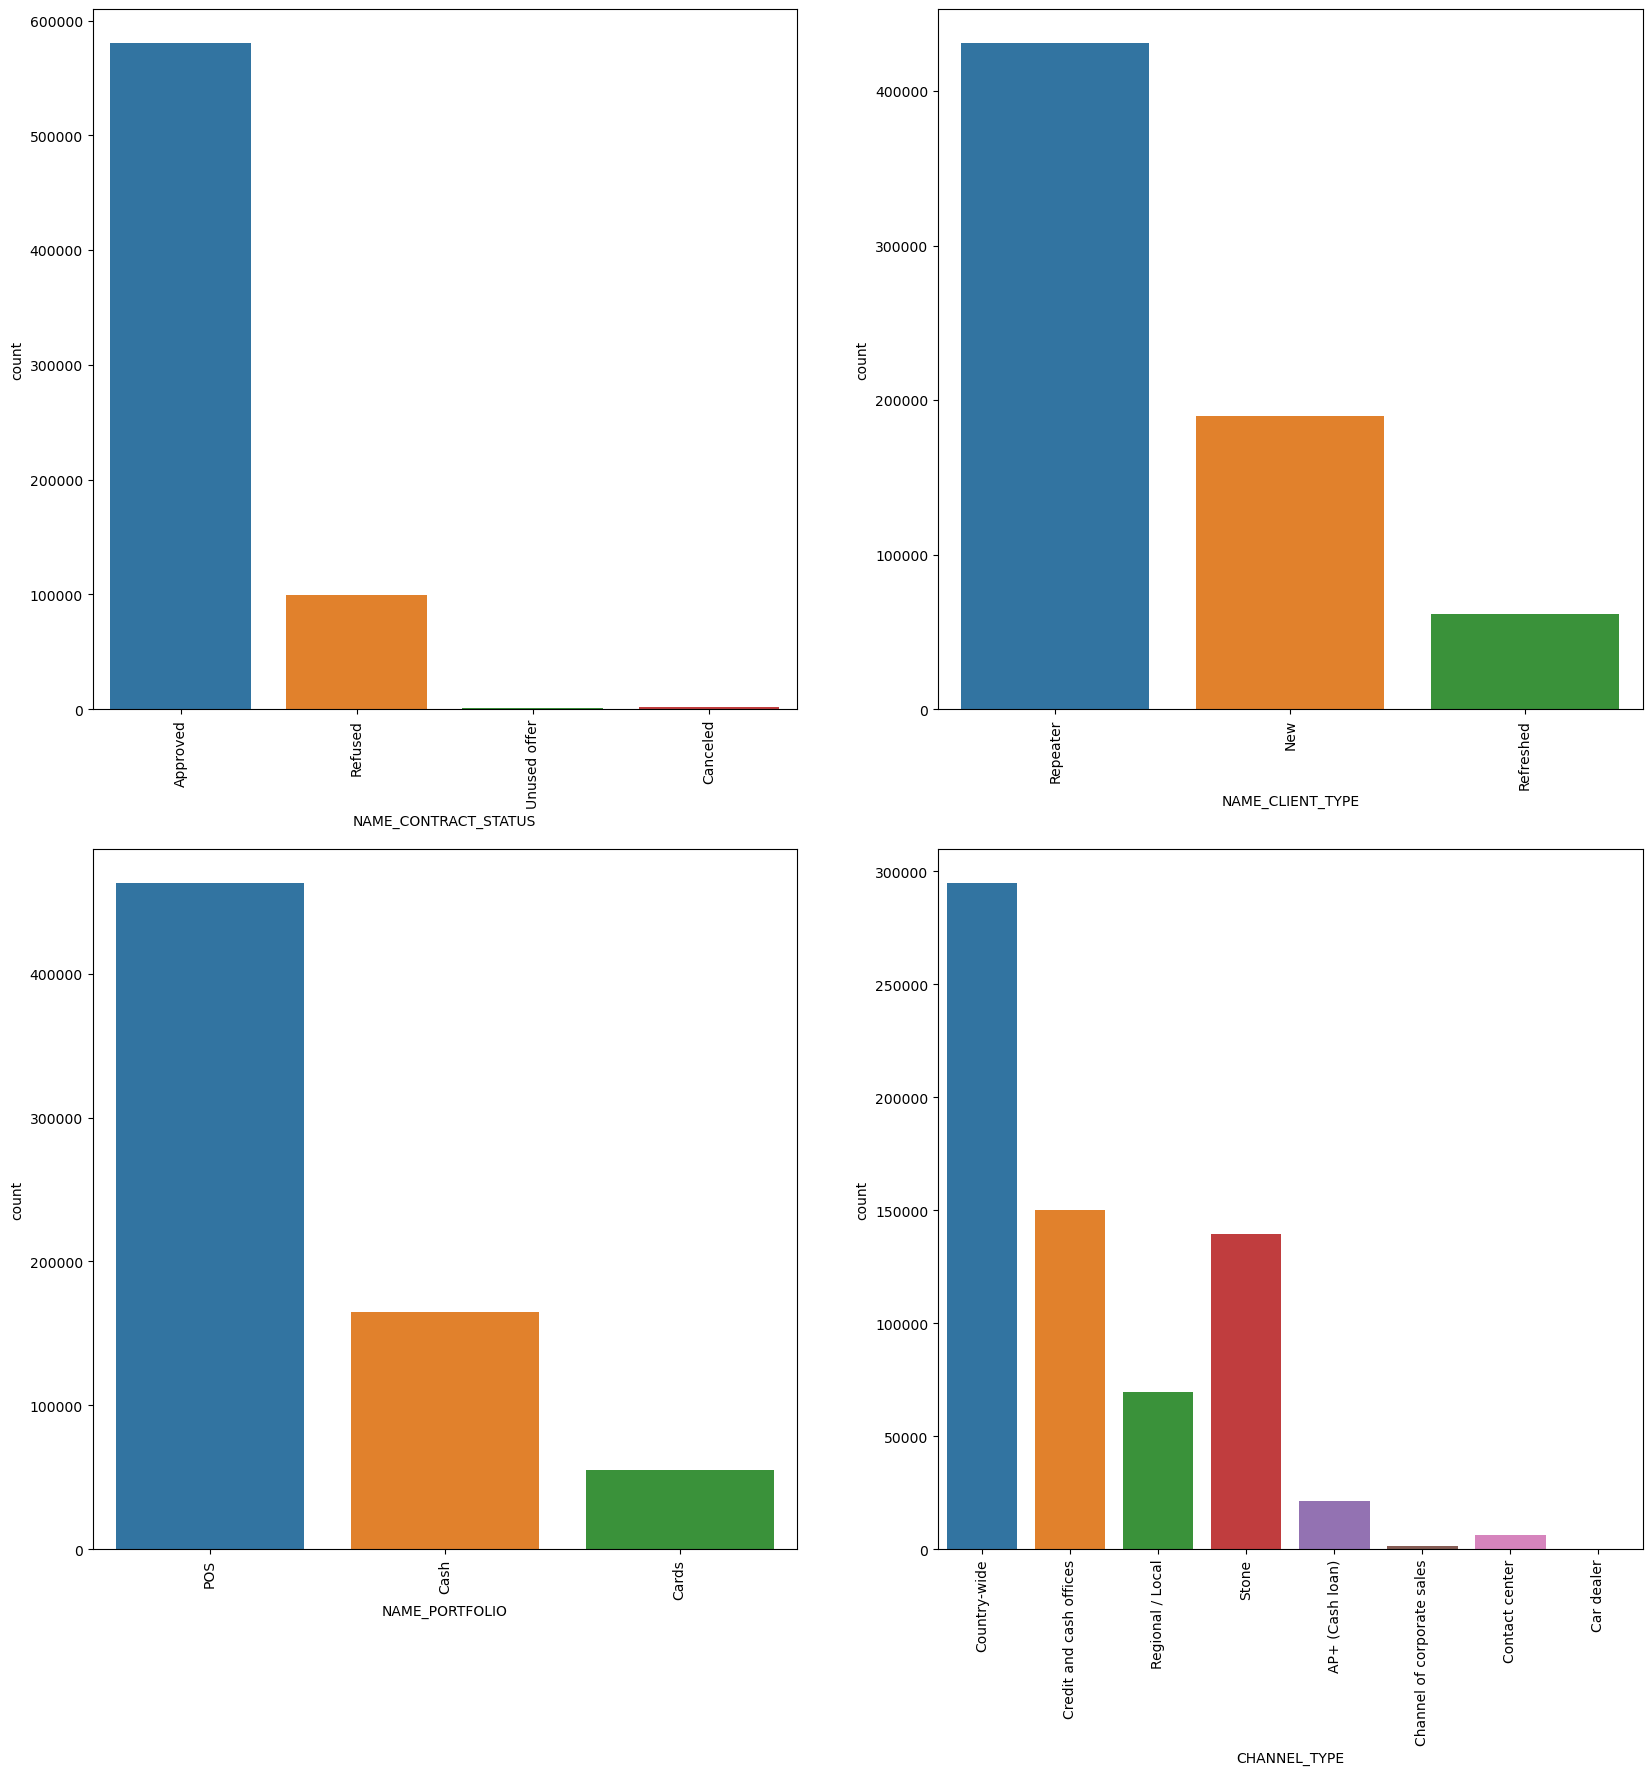

In [85]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

1. Approved loan status is huge than rejected or canceled.
2. Repeater clients are highest in number than new client.
3. POS loans are highest rather than cash loans.
4. Country-wide channel type is the most used channel followed by Credit and cash offers.

Continuos columns analysis

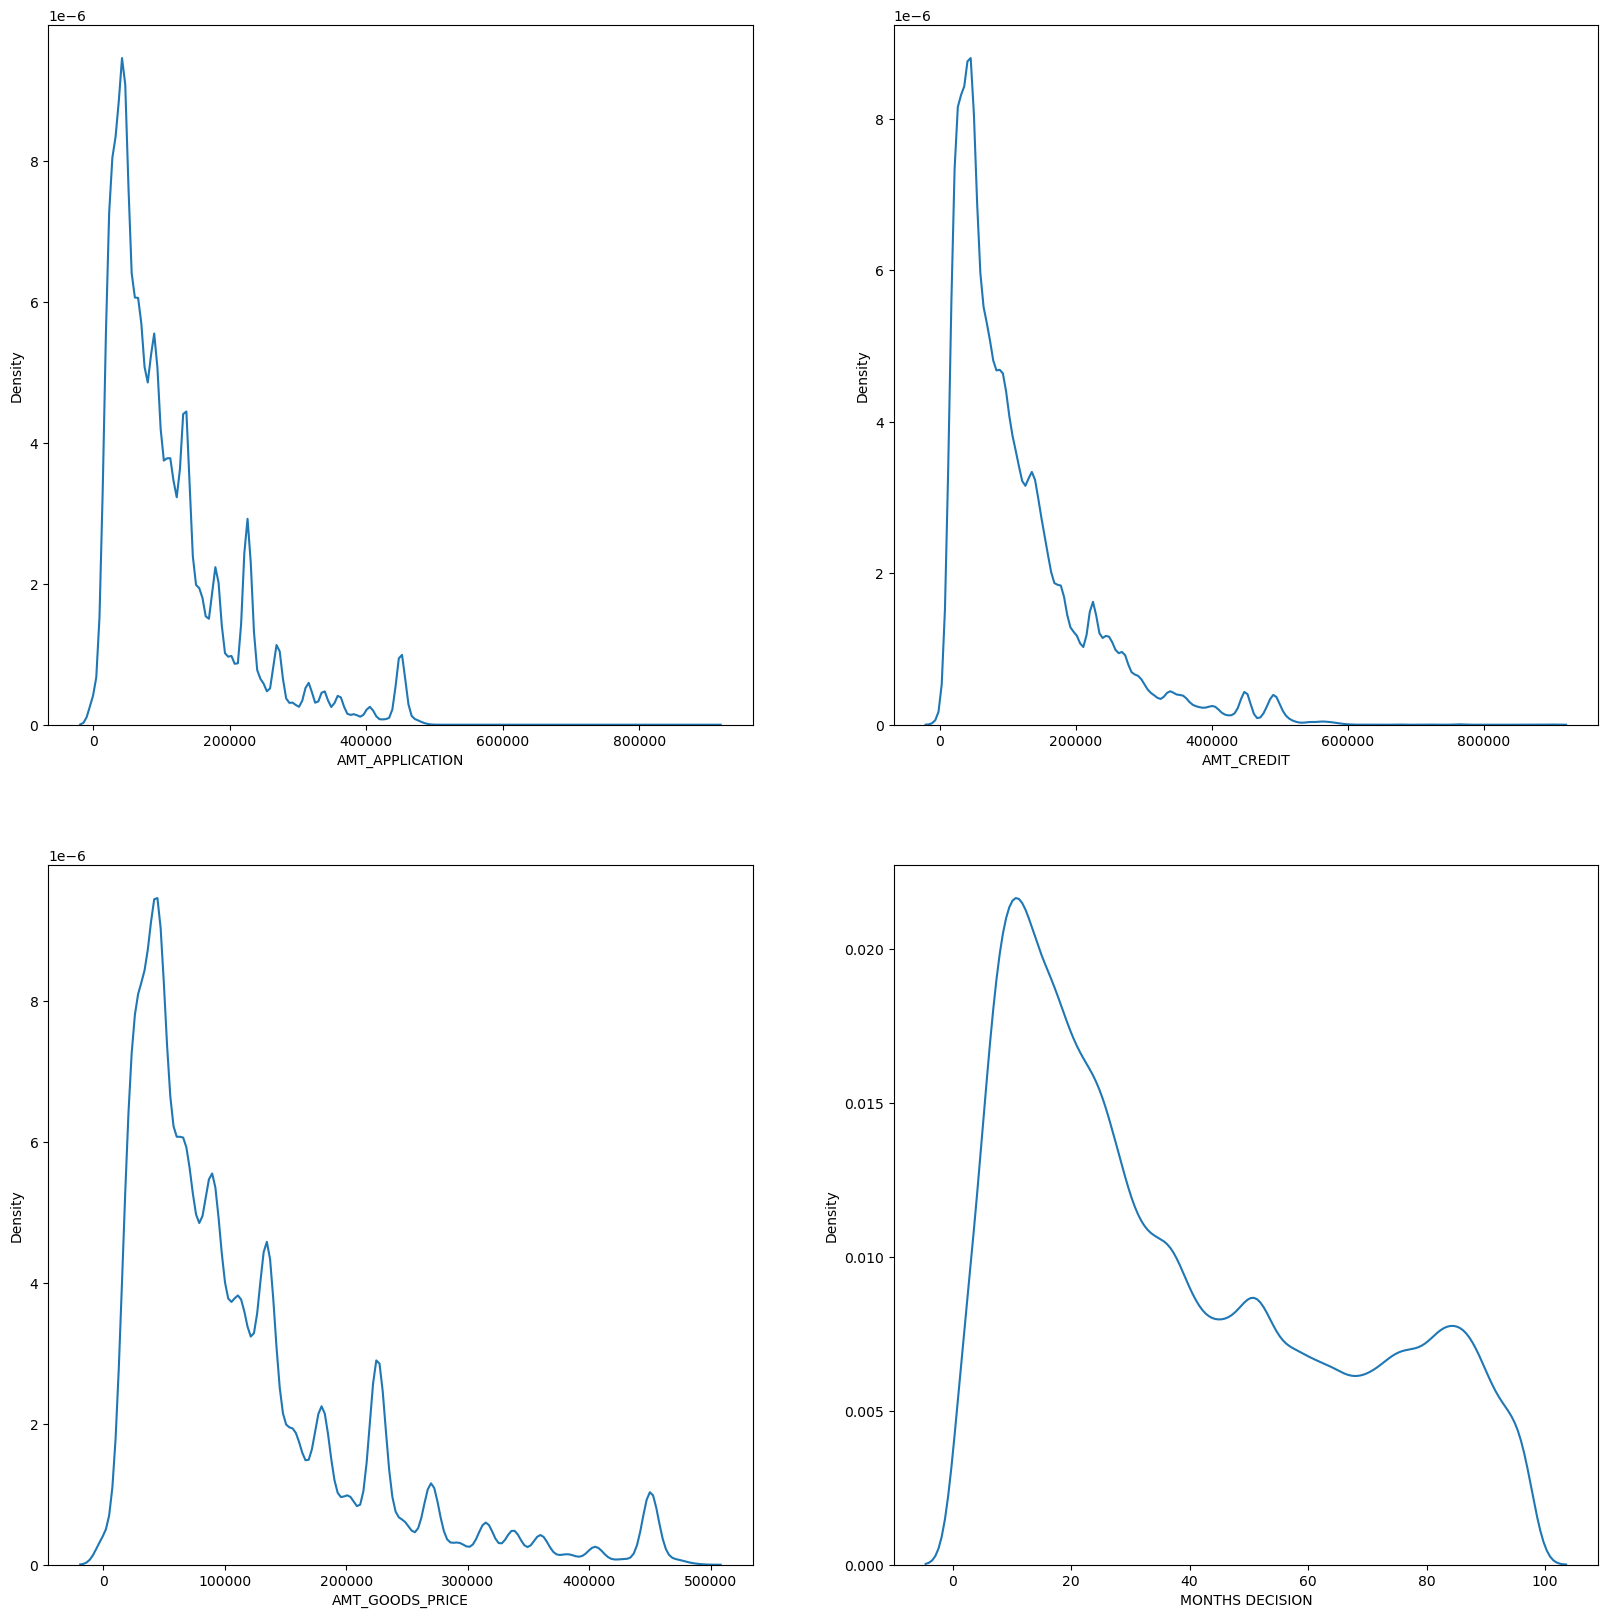

In [86]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots.
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.
4. Most of the applications decision took around 10 to 30 months.

## Bivarient analysis

In [87]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_BIRTH']]

subset.head()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  \
0     1730.430          17145.0     17145.0          17145.0              3   
2    31924.395         337500.0    404055.0         337500.0             27   
3    23703.930         315000.0    340573.5         315000.0             23   
4    13832.775         211500.0    246397.5         211500.0             28   
5    12165.210         148500.0    174361.5         148500.0             29   

   CNT_PAYMENT  DAYS_BIRTH  
0         12.0        40.0  
2         24.0        28.0  
3         18.0        58.0  
4         30.0        64.0  
5         24.0        55.0

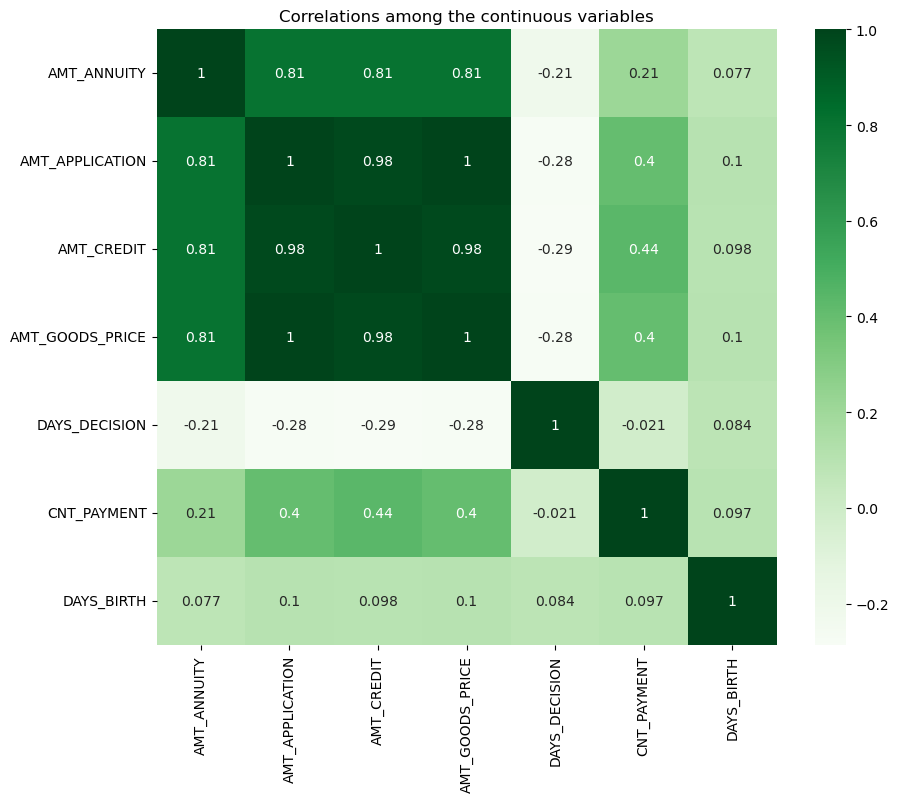

In [88]:
# Graphical analysis to find correlation between set of important columns from merged dataframe
plt.figure(figsize = (10,8))
cor = subset.corr()
sns.heatmap(cor, annot = True, cmap ='Greens')
plt.title('Correlations among the continuous variables')
plt.show()

We can clearly see correlating between variable.
AMT_APPLICATION is correlated with AMT_ANNUTY, AMT_AMT_CREDIT, AMT_GOODS_PRICE

### Bivarient analysis if continuos columns

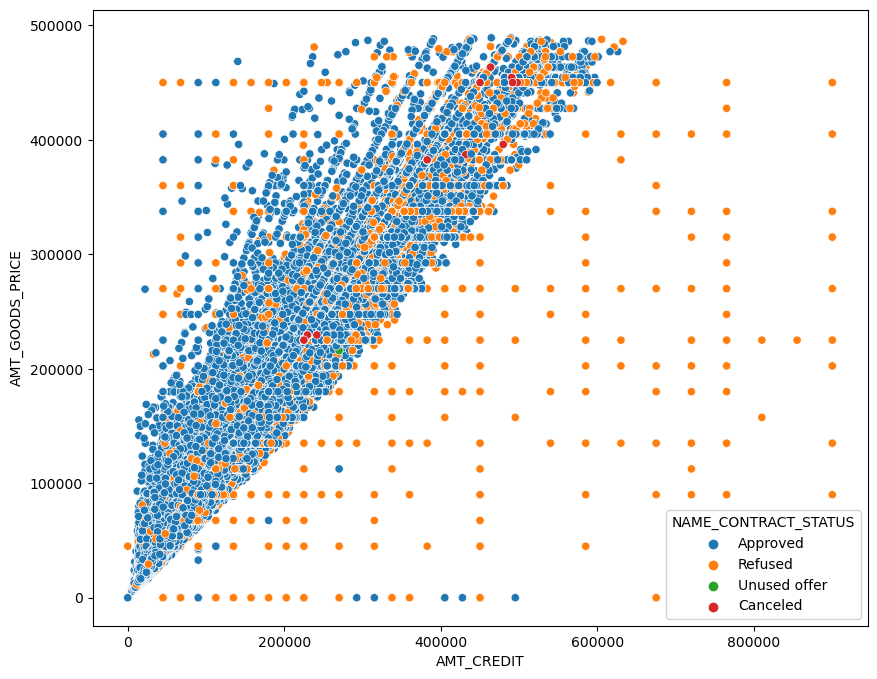

In [89]:
# Finding correlation between AMT_CREDIT, AMT_GOODS_PRICE, NAME_CONTRACT_STATUS

plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

We can see that the concentration of approved is more towards the lower side i,e. less credit amount is likely to be appproved and more amount is likely to be refused

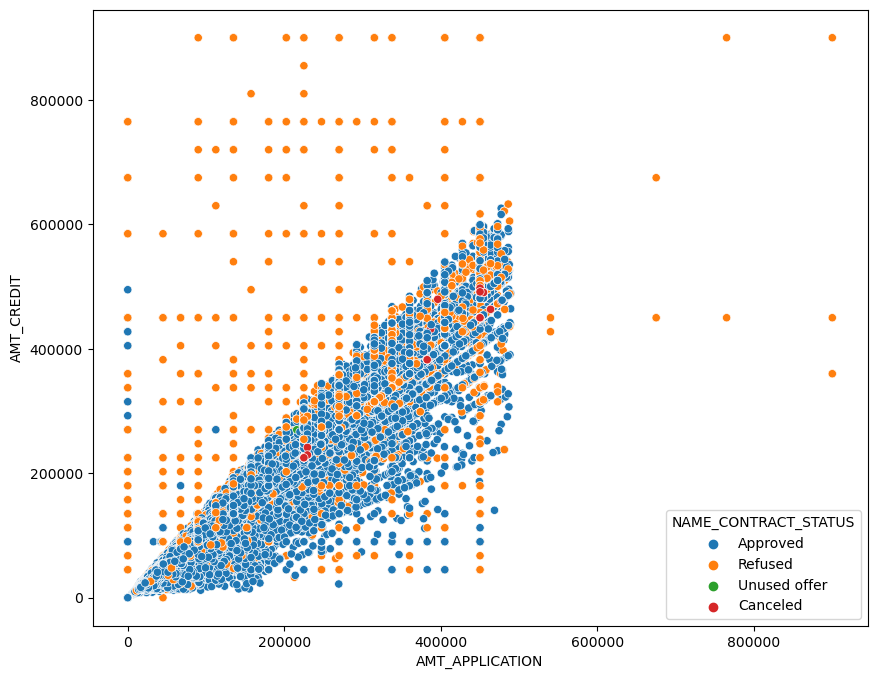

In [90]:
# Relation between AMT_APPLICATION and AMT_CREDIT

plt.figure(figsize = (10,8))
sns.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

We see a very high correlation between AMT_APPLICATION and AMT_CREDIT indicating, more the client asks more the application amount is granted

### Bivarient analysis on categorical columns

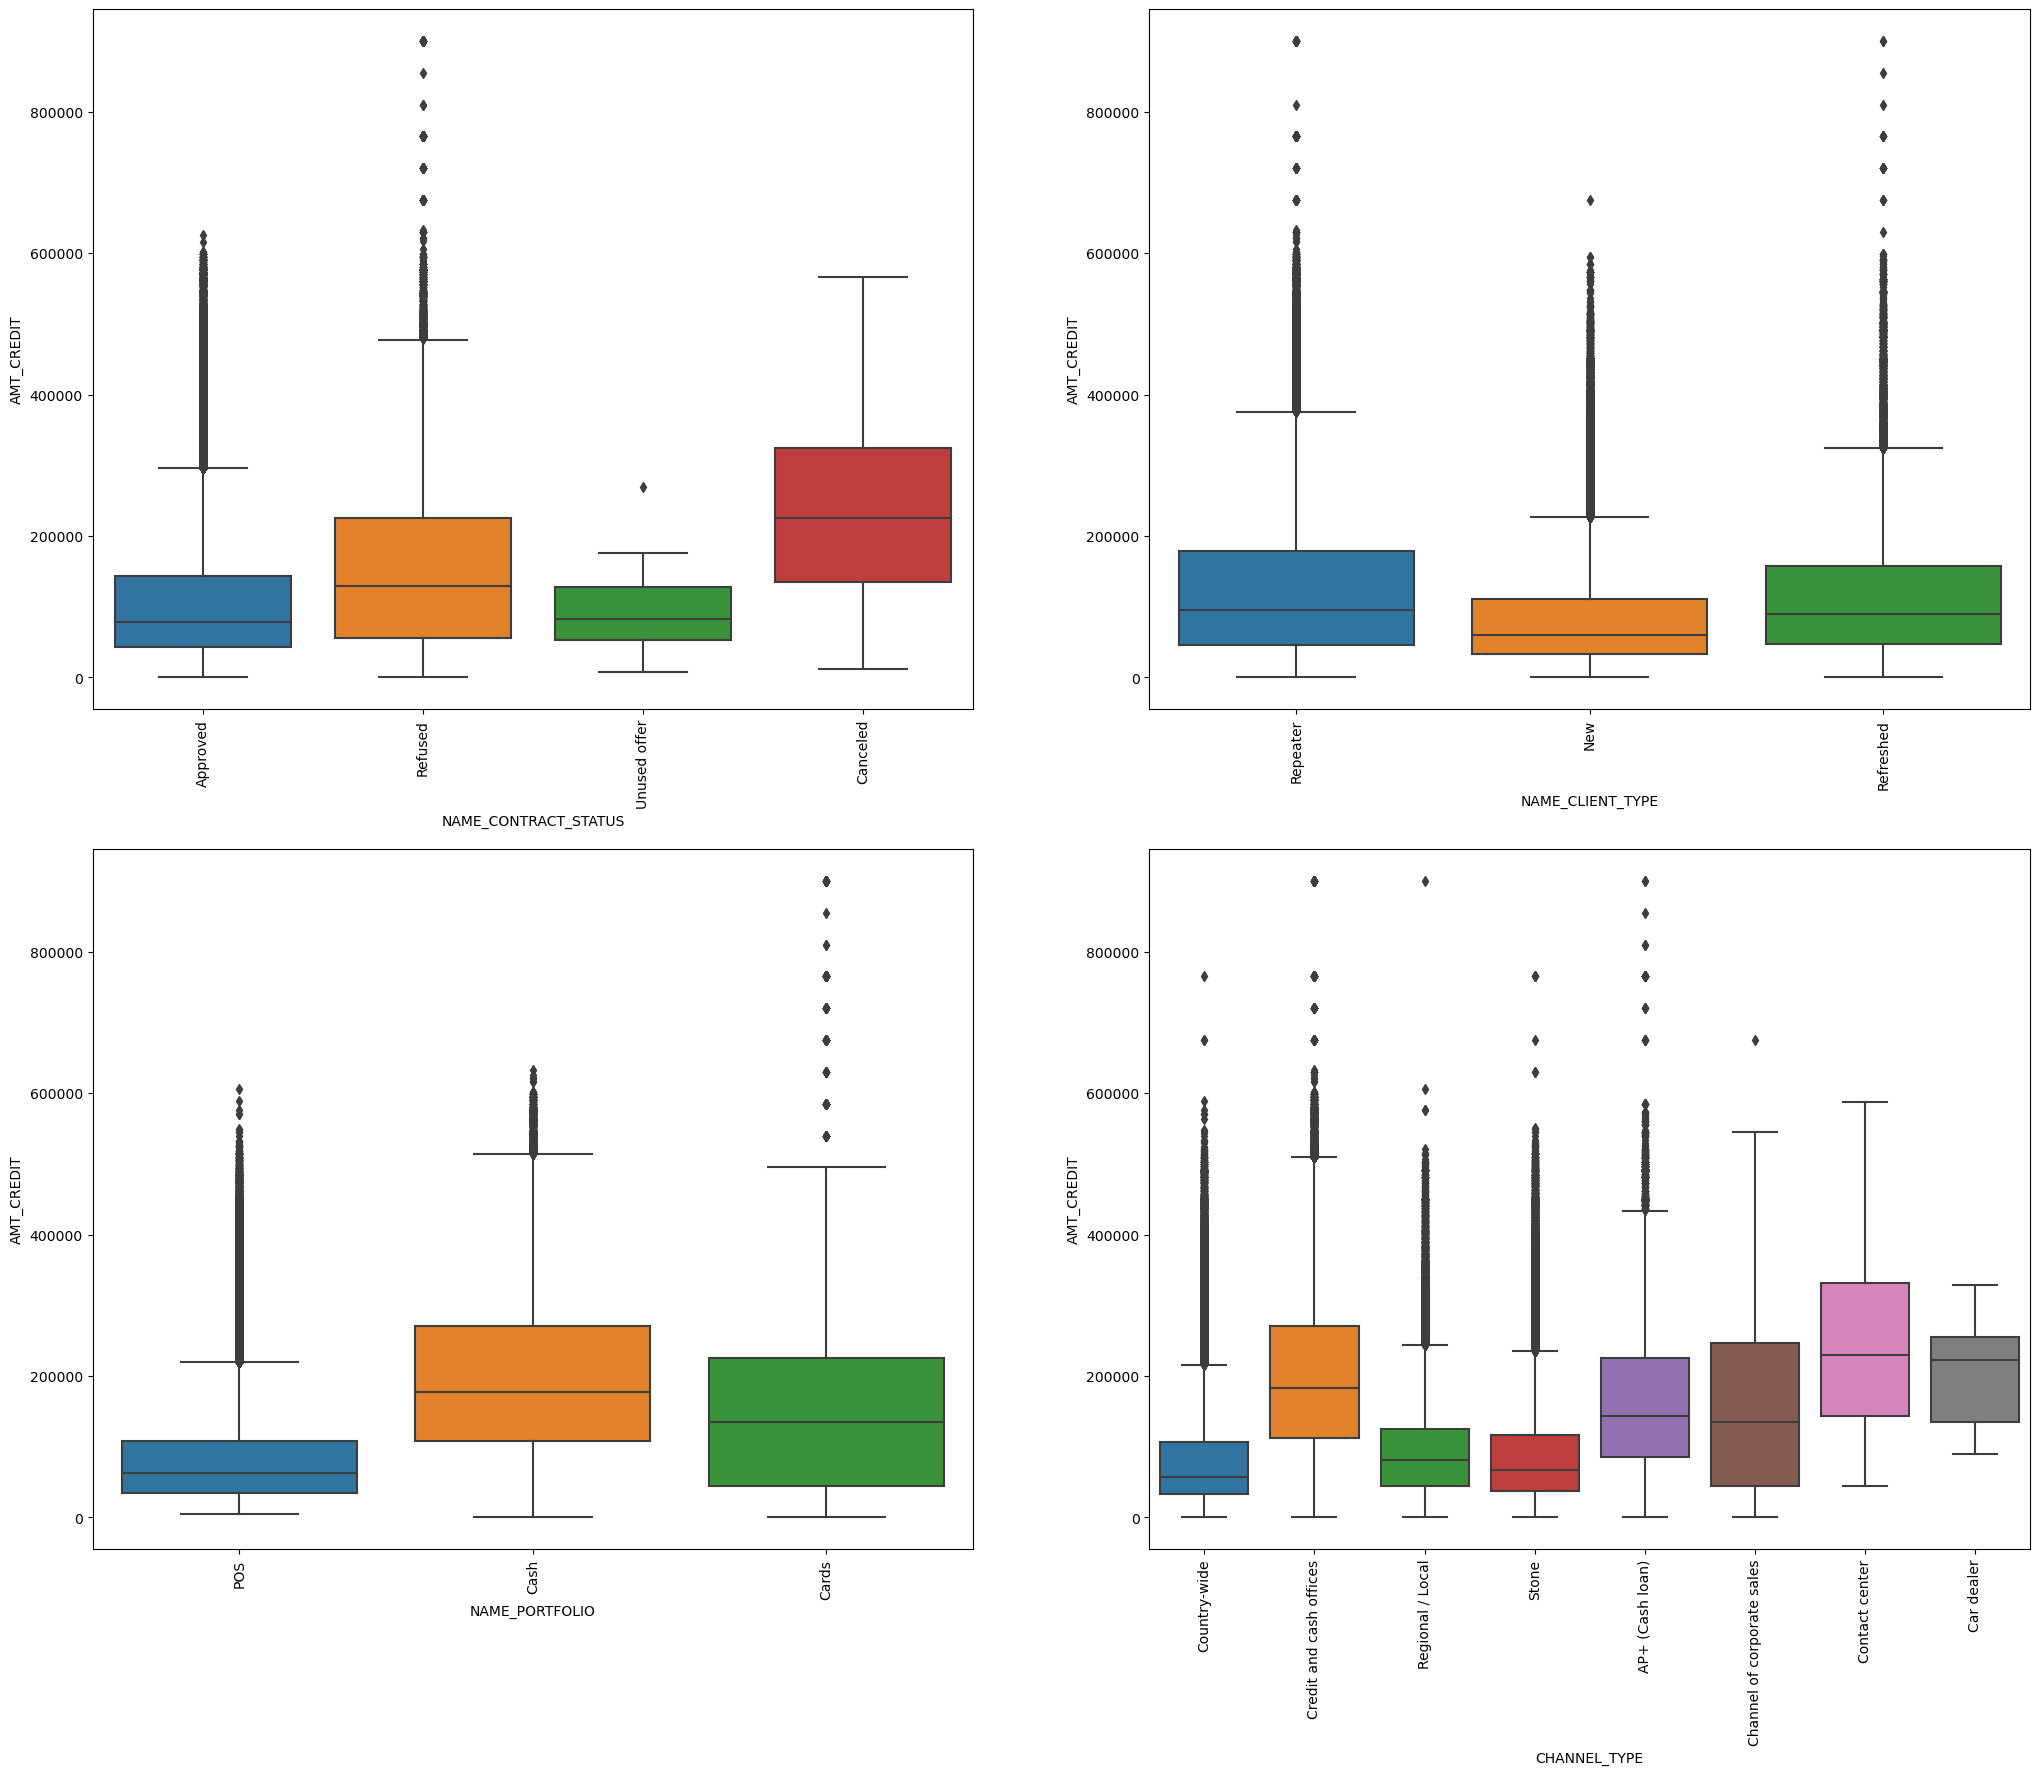

In [91]:
# ploting between categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE'] and AMT_CREDIT

plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

From the above graphs we can concur the following

1. Most of the amount credit was cancelled in status
2. Repeater client got more loan credit
3. Cash loan got more credited.
4. Through the contact center channel, more loan got credited.

In [92]:
#Splitting AMT_Goods_Price into three categories

print(round(application_df['AMT_GOODS_PRICE'].describe(), 3))
q50 = application_df['AMT_GOODS_PRICE'].quantile(0.5)
q75 = application_df['AMT_GOODS_PRICE'].quantile(0.75)

# creating Credit amount groups
def goodsprice_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['GOODSPRICE_CATEGORY'] = application_df['AMT_GOODS_PRICE'].apply(goodsprice_category)

count     238077.000
mean      477314.284
std       285046.838
min        40500.000
25%       229500.000
50%       450000.000
75%       675000.000
max      1341000.000
Name: AMT_GOODS_PRICE, dtype: float64


In [93]:
# Grouping the dataframe by INCOME_CATEGORY and GOODSPRICE_CATEGORY w.r.t. TARGET

pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts())

TARGET
INCOME_CATEGORY GOODSPRICE_CATEGORY TARGET        
High            High                0        26030
                                    1         1669
                Low                 0        32412
                                    1         3324
                Medium              0        21242
                                    1         1767
Low             High                0         8164
                                    1          496
                Low                 0        52363
                                    1         4861
                Medium              0        15518
                                    1         1186
Medium          High                0        13323
                                    1          901
                Low                 0        34608
                                    1         3658
                Medium              0        15323
                                    1         1232

In [94]:
# target pivot table to get the ratio of target=1 w.r.t. GOODSPRICE_CATEGORY and INCOME_CATEGORY
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_priceinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','GOODSPRICE_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_priceinc.drop(0, axis = 1, inplace = True)

target_by_priceinc1 = pd.pivot_table(target_by_priceinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['GOODSPRICE_CATEGORY'], aggfunc = np.sum) 

target_by_priceinc1

GOODSPRICE_CATEGORY      High       Low    Medium
INCOME_CATEGORY                                  
High                 0.060255  0.093015  0.076796
Low                  0.057275  0.084947  0.071001
Medium               0.063344  0.095594  0.074419

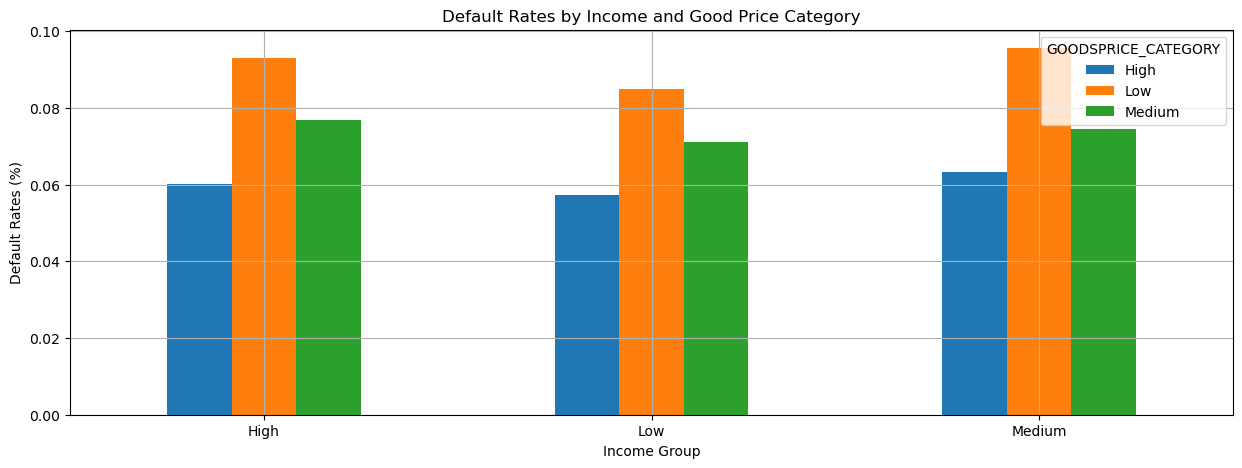

In [95]:
# plotting target pivot table to get the ratio of target=1 w.r.t. GOODSPRICE_CATEGORY and INCOME_CATEGORY
ax = target_by_priceinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Good Price Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

We can see in all the respective income_category groups, the lowest of GOODSPRICE_CATEGORY has the highest defaulters followed by medium and high

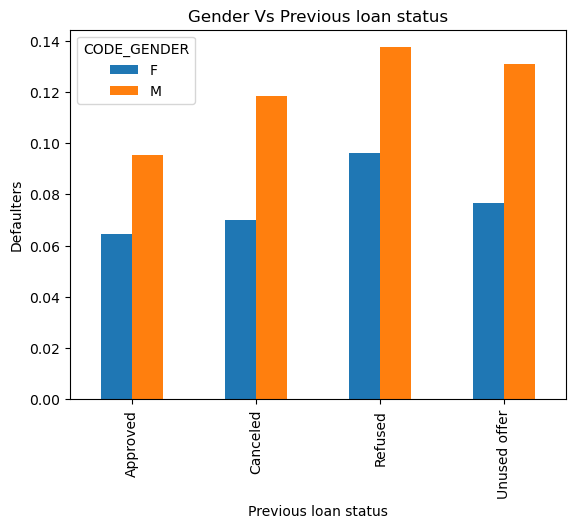

In [96]:
#plotting bar graph for Previous loan status vs Defaulter w.r.t. CODE_GENDER

merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar()
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()

From above graph we can see Male clients have more defaults no matter the status and previously refused clients have defaulted more

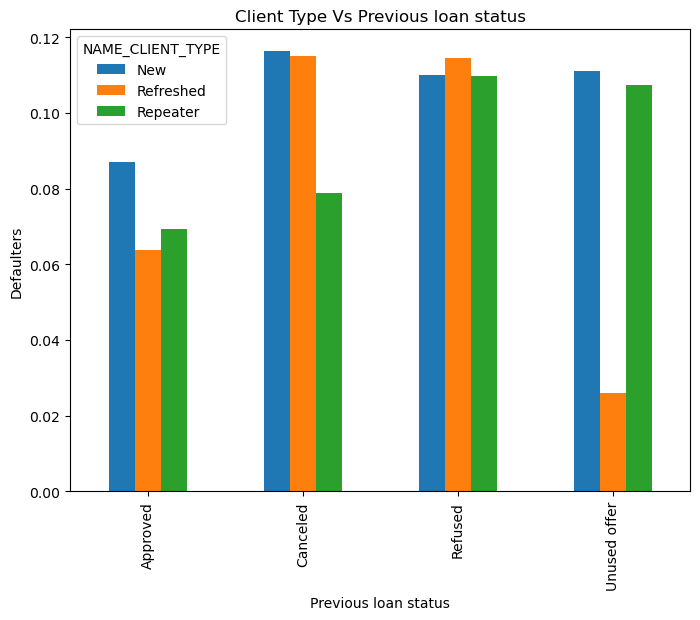

In [97]:
#plotting bar graph for Previous loan status vs Defaulter w.r.t. NAME_CLIENT_TYPE

merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,6))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Client Type Vs Previous loan status')
plt.show()

Previously canceled clients who are new or are refreshed have more number of defaults than others

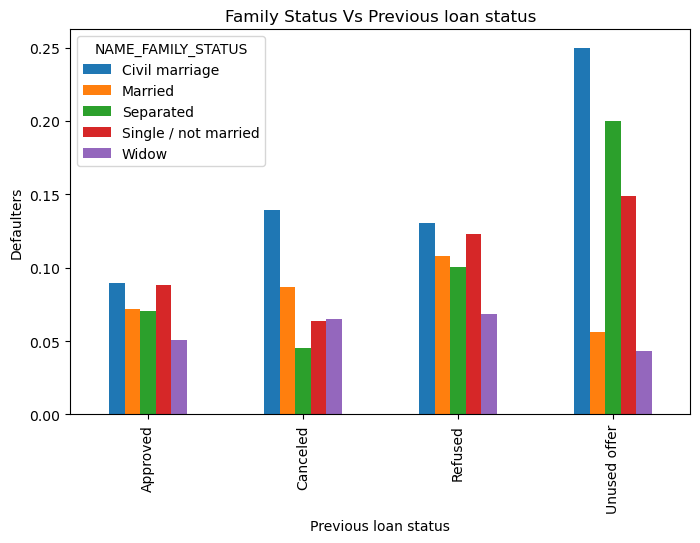

In [98]:
#plotting bar graph for Previous loan status vs Defaulter w.r.t. NAME_FAMILY_STATUS

merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

We can clearly see clients with civil marriages have defaulted more no matter what is the status.
But Clients who had unused offer who have had civil marriages have more default rate.

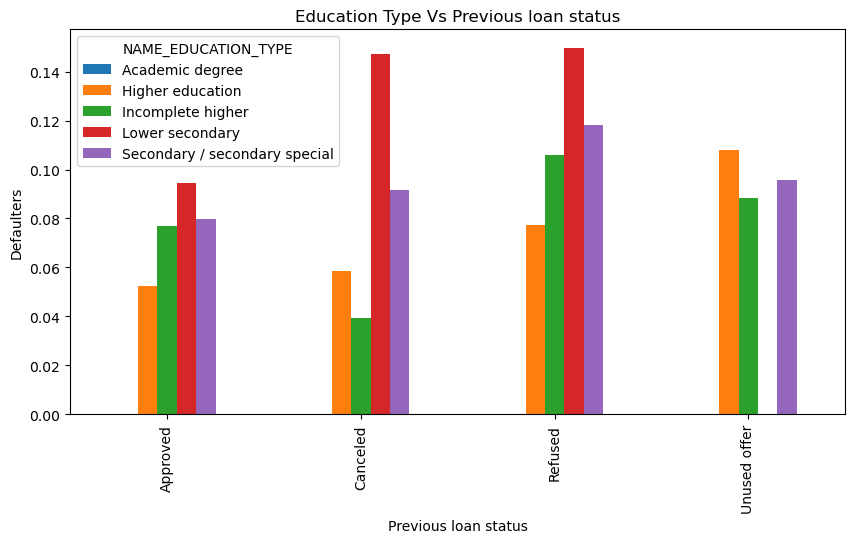

In [99]:
#plotting bar graph for Previous loan status vs Defaulter w.r.t. NAME_EDUCATION_TYPE

merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(10,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

We can see that the clients with lower secondary education has more defaults in all the status except in Unused offer category.

But we can see that clients with lower secondary eduction whose applications were refused previously has more defaults compared to any others

### I believe we have made a comprehensive yet detailed analysis of data we had got. A brief summary of the whole analysis could be found in pdf file attached in the same zip file.